##📊 **Stock Price Movement Prediction using Data Science & Machine Learning**
By :
- Sourav Kumar 24/11/EE/026
- Sarvesh Shahane 24/11/EE/027


In this project, we aim to build a simple yet effective machine learning model to predict whether a stock's price will rise or fall based on historical data. This step-by-step approach combines data science techniques and basic ML models to uncover patterns in stock behavior. We begin by importing the essential libraries required for data manipulation, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
#We can import data from yfinance
#import yfinance as yf

In [ ]:
company_list = ['AAPL','GOOG','MSFT','AMZN']
# ticker_objects = {ticker: yf.Ticker(ticker) for ticker in company_list}
# df_aapl = ticker_objects['AAPL'].history(start='2023-01-01', end='2025-01-01')
# df_itc = ticker_objects['GOOG'].history(start='2023-01-01', end='2025-01-01')
# df_lt = ticker_objects['MSFT'].history(start='2023-01-01', end='2025-01-01')
# df_sbi = ticker_objects['AMZN'].history(start='2023-01-01', end='2025-01-01')

# stock_data = {
#     'AAPL': df_aapl,
#     'GOOG': df_goog,
#     'MSFT': df_msft,
#     'AMZN': df_amzn
# }
# But due to api call limit we had converted the data we got from yfinance to a csv files

### 📥 **Data Collection & Preparation**

To train our model effectively, we need access to historical stock price data. Originally, this was done using the yfinance API to fetch daily price data for major tech companies: Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN). However, to work around API call limits and ensure reproducibility, we saved the data into local CSV files and are now importing them directly.

The following code reads the CSVs, converts the Date column to datetime format, sets it as the index, and organizes the data into a dictionary for easy access.

In [ ]:
df_aapl = pd.read_csv('AAPL.csv')
df_goog = pd.read_csv('GOOG.csv')
df_msft = pd.read_csv('MSFT.csv')
df_amzn = pd.read_csv('AMZN.csv')

df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], utc=True)
df_goog['Date'] = pd.to_datetime(df_goog['Date'], utc=True)
df_msft['Date'] = pd.to_datetime(df_msft['Date'], utc=True)
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], utc=True)

df_aapl.set_index('Date', inplace=True)
df_goog.set_index('Date', inplace=True)
df_msft.set_index('Date', inplace=True)
df_amzn.set_index('Date', inplace=True)

df_aapl.index = pd.to_datetime(df_aapl.index)
df_goog.index = pd.to_datetime(df_goog.index)
df_msft.index = pd.to_datetime(df_msft.index)
df_amzn.index = pd.to_datetime(df_amzn.index)

stock_data = {
    'AAPL': df_aapl,
    'GOOG': df_goog,
    'MSFT': df_msft,
    'AMZN': df_amzn
}

## **🔍 Initial Data Inspection: Exploring Stock Price Data**

Before jumping into modeling, it's essential to understand the structure, scale, and quality of the data we're working with. Here, we preview the first and last few rows of the stock price datasets for Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN) to ensure the data was loaded correctly.

In [ ]:
print(stock_data['AAPL'].head(),"\n\n")
print(stock_data['GOOG'].head(),"\n\n")
print(stock_data['MSFT'].head(),"\n\n")
print(stock_data['AMZN'].head(),"\n\n")

                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 05:00:00+00:00  128.782649  129.395518  122.742873  123.632530   
2023-01-04 05:00:00+00:00  125.431607  127.181268  123.642412  124.907700   
2023-01-05 05:00:00+00:00  125.668849  126.301493  123.326093  123.583099   
2023-01-06 05:00:00+00:00  124.561717  128.792516  123.454587  128.130219   
2023-01-09 05:00:00+00:00  128.970443  131.876655  128.397108  128.654114   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-01-03 05:00:00+00:00  112117500        0.0           0.0  
2023-01-04 05:00:00+00:00   89113600        0.0           0.0  
2023-01-05 05:00:00+00:00   80962700        0.0           0.0  
2023-01-06 05:00:00+00:00   87754700        0.0           0.0  
2023-01-09 05:00:00+00:00   70790800        0.0           0.0   


         

In [ ]:
print(stock_data['AAPL'].tail(),"\n\n")
print(stock_data['GOOG'].tail(),"\n\n")
print(stock_data['MSFT'].tail(),"\n\n")
print(stock_data['AMZN'].tail(),"\n\n")

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-24 05:00:00+00:00  255.209412  257.926411  255.009620  257.916443   
2024-12-26 05:00:00+00:00  257.906429  259.814335  257.347047  258.735504   
2024-12-27 05:00:00+00:00  257.546826  258.415896  252.782075  255.309296   
2024-12-30 05:00:00+00:00  251.952985  253.221595  250.474615  251.923019   
2024-12-31 05:00:00+00:00  252.162760  253.001833  249.156056  250.144974   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-12-24 05:00:00+00:00  23234700        0.0           0.0  
2024-12-26 05:00:00+00:00  27237100        0.0           0.0  
2024-12-27 05:00:00+00:00  42355300        0.0           0.0  
2024-12-30 05:00:00+00:00  35557500        0.0           0.0  
2024-12-31 05:00:00+00:00  39480700        0.0           0.0   


                

Following that, we generate some basic statistical summaries and metadata to better understand each dataset’s distribution, completeness, and format.

In [ ]:
stock_data["AAPL"].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.0
mean,188.617837,190.387805,187.119866,188.889048,5.816798e+07,0.003865,0.0
std,28.204759,28.352140,27.968260,28.210339,2.518706e+07,0.030410,0.0
min,124.561717,126.301493,122.742873,123.583099,2.323470e+07,0.000000,0.0
25%,170.760563,172.311035,169.428693,170.682785,4.495800e+07,0.000000,0.0
50%,184.046029,185.447588,182.479424,184.102707,5.250285e+07,0.000000,0.0
75%,213.781500,216.331215,211.247522,213.559738,6.489808e+07,0.000000,0.0
max,257.906429,259.814335,257.347047,258.735504,3.186799e+08,0.250000,0.0


In [ ]:
stock_data["GOOG"].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.0
mean,141.793480,143.390268,140.464302,141.961595,2.261962e+07,0.001195,0.0
std,27.936618,28.079482,27.692394,27.836115,1.008956e+07,0.015430,0.0
min,86.311196,87.794168,85.166606,86.360954,6.809800e+06,0.000000,0.0
25%,123.454013,124.838702,122.265894,123.480137,1.659482e+07,0.000000,0.0
50%,139.011575,140.290513,137.812260,139.061340,1.997585e+07,0.000000,0.0
75%,165.826502,167.483771,164.356078,165.925339,2.557108e+07,0.000000,0.0
max,198.304075,202.649131,196.466172,197.934509,9.779860e+07,0.200000,0.0


In [ ]:
stock_data["MSFT"].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.0
mean,363.978148,367.107174,360.714846,364.064568,2.411757e+07,0.011693,0.0
std,62.869152,62.935850,62.448566,62.717111,9.808173e+06,0.092184,0.0
min,218.960377,221.670374,215.376502,218.282883,7.164500e+06,0.000000,0.0
25%,321.164375,325.274823,318.071886,321.030548,1.775620e+07,0.000000,0.0
50%,373.225105,375.761032,371.526244,374.091888,2.168025e+07,0.000000,0.0
75%,416.902104,420.445499,413.920118,416.747025,2.719730e+07,0.000000,0.0
max,464.297590,465.639777,461.772294,464.854340,7.847820e+07,0.830000,0.0


In [ ]:
stock_data["AMZN"].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.0,502.0
mean,153.032231,154.749303,151.291175,153.126753,4.987182e+07,0.0,0.0
std,36.580031,36.733293,36.279068,36.496898,2.083135e+07,0.0,0.0
min,83.029999,85.419998,81.430000,83.120003,1.500750e+07,0.0,0.0
25%,126.785000,128.467499,125.150000,127.027500,3.623420e+07,0.0,0.0
50%,152.834999,153.974998,151.584999,153.250000,4.504760e+07,0.0,0.0
75%,183.252502,185.100006,181.535004,183.484997,5.703685e+07,0.0,0.0
max,232.389999,233.000000,228.009995,232.929993,1.581542e+08,0.0,0.0


In [ ]:
print(stock_data["AAPL"].info(),"\n\n")
print(stock_data["GOOG"].info(),"\n\n")
print(stock_data["MSFT"].info(),"\n\n")
print(stock_data["AMZN"].info(),"\n\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-03 05:00:00+00:00 to 2024-12-31 05:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Volume        502 non-null    int64  
 5   Dividends     502 non-null    float64
 6   Stock Splits  502 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.4 KB
None 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-03 05:00:00+00:00 to 2024-12-31 05:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null  

**🧾 Inference: Dataset Structure**

*   Each dataset has 502 daily records indexed by date and time.
*   All expected columns are present: Open, High, Low, Close, Volume, Dividends, and Stock Splits.
*   No null values exist in any column.
*   Data types are correctly assigned, making the dataset ready for feature engineering and modeling.





## **🧮 Adjusting Close Prices for Dividends and Splits**

Most financial analyses rely on Adjusted Close prices, which account for dividends and stock splits. Since our dataset does not provide the adjusted close directly, we need to compute it manually.

To do this, we first check if there are any stock splits or dividends in the dataset. If stock splits were present, more complex adjustments would be needed. However, we found no stock splits, but some companies did issue dividends.

Given this, we adjust the close price using the formula:

Adjusted Close = Close - Dividends

This step ensures our price data reflects the actual value received by investors

In [ ]:
# Since the adjusted close price is not available, we will calculate it explicitly.
# First we will check if there is any dividend or stock split factor in the data

for i in range(0,4):
  splits = stock_data[company_list[i]]['Stock Splits'].unique()
  if not all (splits == 0):
    print(f"{company_list[i]} had stock splits: {splits}")
  else:
    print(f"{company_list[i]} had no stock splits.")

print('\n')

for i in range(0,4):
  dividends = stock_data[company_list[i]]['Dividends'].unique()
  if not all (dividends == 0):
    print(f"{company_list[i]} had dividends: {dividends}")
  else:
    print(f"{company_list[i]} had no stock dividends.")

# As there is no stock split factor but we have dividends, we calculating :
# Adj close = close - dividends

print('\n')

for cname in company_list:
  print(f'Data for {cname}', '\n')
  stock_data[cname]['Adj Close'] = stock_data[cname]['Close'] - stock_data[cname]['Dividends']
  print(stock_data[cname][stock_data[cname]['Dividends'] != 0][['Close','Adj Close']], '\n\n')

AAPL had no stock splits.
GOOG had no stock splits.
MSFT had no stock splits.
AMZN had no stock splits.


AAPL had dividends: [0.   0.23 0.24 0.25]
GOOG had dividends: [0.  0.2]
MSFT had dividends: [0.   0.68 0.75 0.83]
AMZN had no stock dividends.


Data for AAPL 

                                Close   Adj Close
Date                                             
2023-02-10 05:00:00+00:00  149.502304  149.272304
2023-05-12 04:00:00+00:00  171.083359  170.843359
2023-08-11 04:00:00+00:00  176.496399  176.256399
2023-11-10 05:00:00+00:00  185.287567  185.047567
2024-02-09 05:00:00+00:00  187.962479  187.722479
2024-05-10 04:00:00+00:00  182.436859  182.186859
2024-08-12 04:00:00+00:00  217.052292  216.802292
2024-11-08 05:00:00+00:00  226.710739  226.460739 


Data for GOOG 

                                Close   Adj Close
Date                                             
2024-06-10 04:00:00+00:00  175.997375  175.797375
2024-09-09 04:00:00+00:00  149.200546  149.000546
2024-12-09 05:

## **🧹 Data Integrity Check: Handling Missing Values and Duplicates**

Before proceeding to feature engineering or modeling, it's essential to ensure that our data is clean and reliable. Here, we perform three quick but vital checks:

**1. Missing Values:**

We verify if any NaN values exist in the dataset. Fortunately, our datasets contain no missing values. However, if they did, we would handle them using dropna() or appropriate imputation techniques.

**2. Data Shape Validation:**

Even after calling dropna(), we confirmed that the size of each DataFrame remained unchanged — a positive sign that no rows were dropped.

**3.Duplicate Records:**

We also check for duplicate rows, which could skew our analysis. Thankfully, there are no duplicate records in any of the datasets.

In [ ]:
for cname in company_list:
  print(f'Company Name : {cname}','\n')
  print(stock_data[cname].isnull().sum(),'\n\n')

#We dont have any null value in our dataset but if it would be there, we need to use dropna()
for cname in company_list:
  stock_data[cname].dropna()
  print(f'Company Name : {cname}')
  print(f'Size of the data : {stock_data[cname].size}')
#Size of the data is same a it was before using dropna()

print('\n\n')

#Checking for Duplicates
for cname in company_list:
  print(f'Company Name : {cname}')
  print(stock_data[cname].duplicated().sum(),'\n')

Company Name : AAPL 

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Adj Close       0
dtype: int64 


Company Name : GOOG 

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Adj Close       0
dtype: int64 


Company Name : MSFT 

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Adj Close       0
dtype: int64 


Company Name : AMZN 

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Adj Close       0
dtype: int64 


Company Name : AAPL
Size of the data : 4016
Company Name : GOOG
Size of the data : 4016
Company Name : MSFT
Size of the data : 4016
Company Name : AMZN
Size of the data : 4016



Company Name : AAPL
0 

Company Name : GOOG
0 

Company Name : MSFT
0 

Company Name : AMZN
0

**✅ Inference: Data Quality Check**

* No missing values were found in any of the stock datasets.

* Applying dropna() had no effect, confirming that the data is already complete.

* No duplicate entries were detected.

* Each dataset contains 4,016 data points, ensuring consistency across all stocks.

## **📈 Feature Engineering: Adding Daily Return and Volatility**

To make informed predictions about stock price movement, we introduce two key derived features:

1. **Daily Return**

  This captures the percentage change in adjusted closing price from one day to the next. It's a measure of short-term price movement and is calculated using:

        Daily Return = Adj Close % Change

2. **Rolling Volatility (10-Day)**

  Volatility represents the degree of price variation over time. We calculate 10-day rolling standard deviation of daily returns to capture recent price fluctuation trends:

        Volatility = std(Daily Return over past 10 days)

These engineered features will provide the model with both momentum and risk-related context.

In [ ]:
for cname in company_list:
  stock_data[cname]['Daily Return'] = stock_data[cname]['Adj Close'].pct_change()
  stock_data[cname]['Volatility'] = stock_data[cname]['Daily Return'].rolling(window=10).std()
  print(f'Company name: {cname}','\n')
  print(stock_data[cname].describe(),'\n\n')

Company name: AAPL 

             Open        High         Low       Close        Volume  \
count  502.000000  502.000000  502.000000  502.000000  5.020000e+02   
mean   188.617837  190.387805  187.119866  188.889048  5.816798e+07   
std     28.204759   28.352140   27.968260   28.210339  2.518706e+07   
min    124.561717  126.301493  122.742873  123.583099  2.323470e+07   
25%    170.760563  172.311035  169.428693  170.682785  4.495800e+07   
50%    184.046029  185.447588  182.479424  184.102707  5.250285e+07   
75%    213.781500  216.331215  211.247522  213.559738  6.489808e+07   
max    257.906429  259.814335  257.347047  258.735504  3.186799e+08   

        Dividends  Stock Splits   Adj Close  Daily Return  Volatility  
count  502.000000         502.0  502.000000    501.000000  492.000000  
mean     0.003865           0.0  188.885183      0.001498    0.012675  
std      0.030410           0.0   28.210533      0.013457    0.004322  
min      0.000000           0.0  123.583099     -0.

## **🧪 Validating Newly Engineered Features for Missing Values**


In [ ]:
#Checking for NaN Values in the newly added data
for cname in company_list:
  print(f'Company : {cname}','\n')
  print(stock_data[cname].isnull().sum(), '\n\n')

#Because daily return is calculated as the percentage change from the previous day's price, and on the first day, there is no previous day to compare to.
#The volatility is typically calculated as the standard deviation of returns over a rolling window, here it is 10 days.
#Mathematically, they are correct.

Company : AAPL 

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Adj Close        0
Daily Return     1
Volatility      10
dtype: int64 


Company : GOOG 

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Adj Close        0
Daily Return     1
Volatility      10
dtype: int64 


Company : MSFT 

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Adj Close        0
Daily Return     1
Volatility      10
dtype: int64 


Company : AMZN 

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Adj Close        0
Daily Return     1
Volatility      10
dtype: int64 




## **📊 Visualizing Stock Prices: Adjusted Closing Price Over Time**

The following code generates line plots for the Adjusted Closing Price of each company in your list, giving us a clear view of their price movements over the specified period. This visualization helps in identifying trends, patterns, or anomalies in the stock's performance.

<Figure size 1500x1000 with 0 Axes>

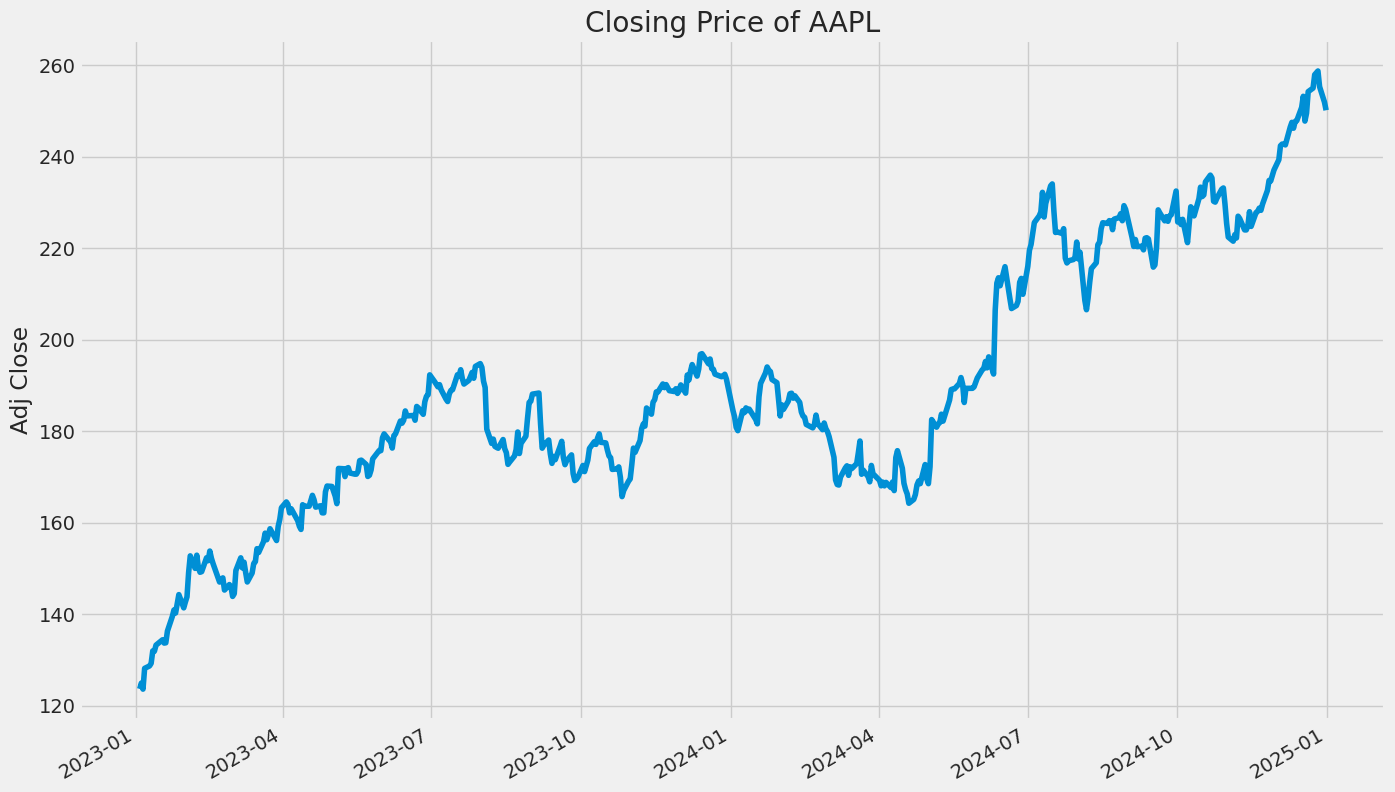

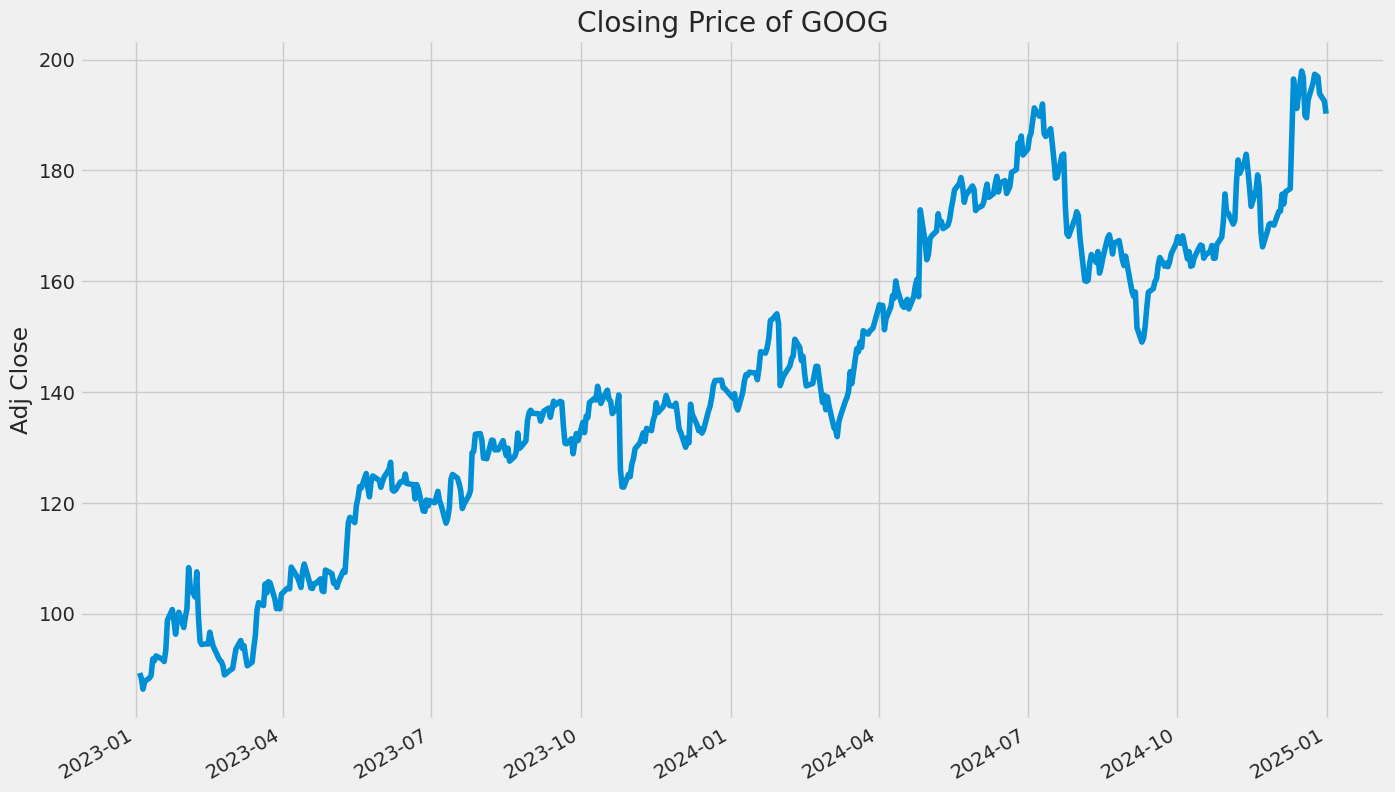

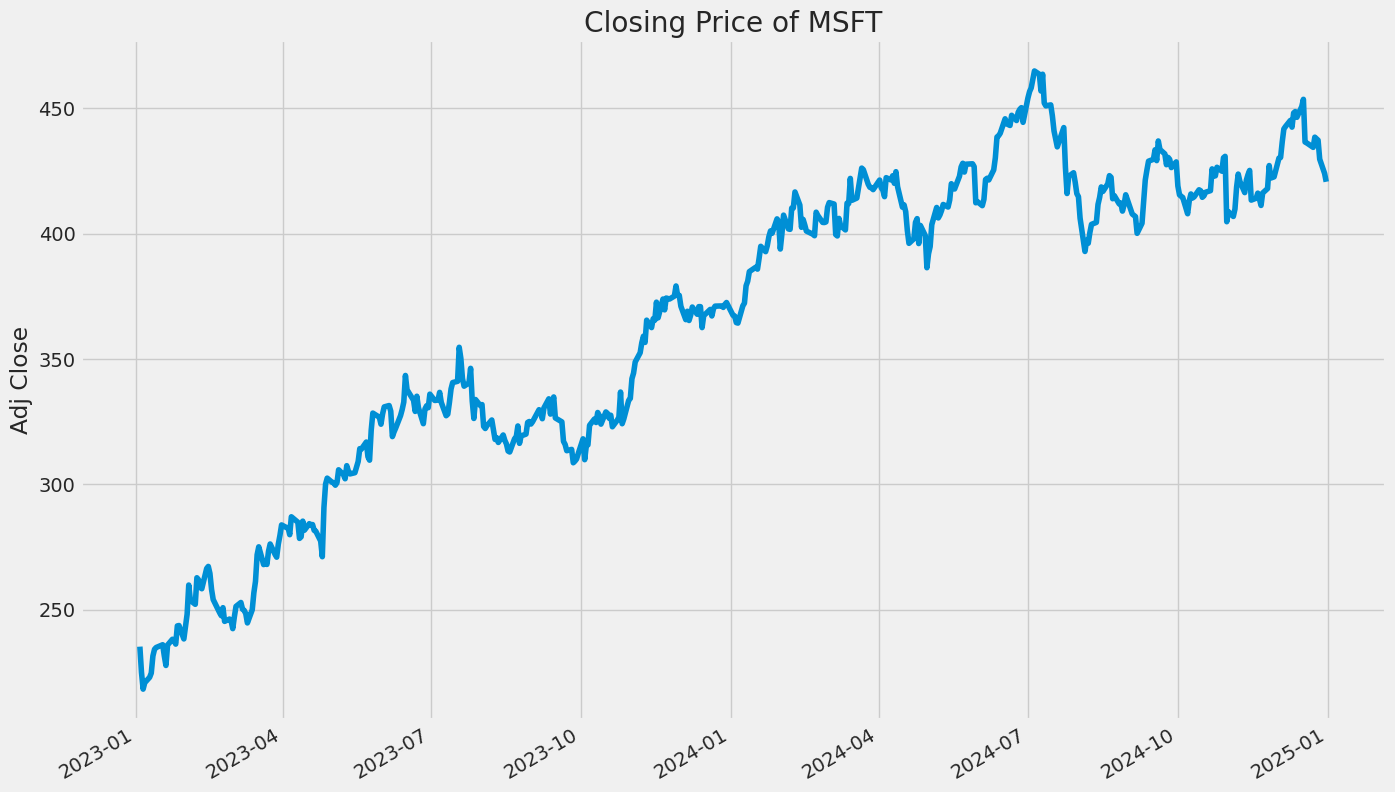

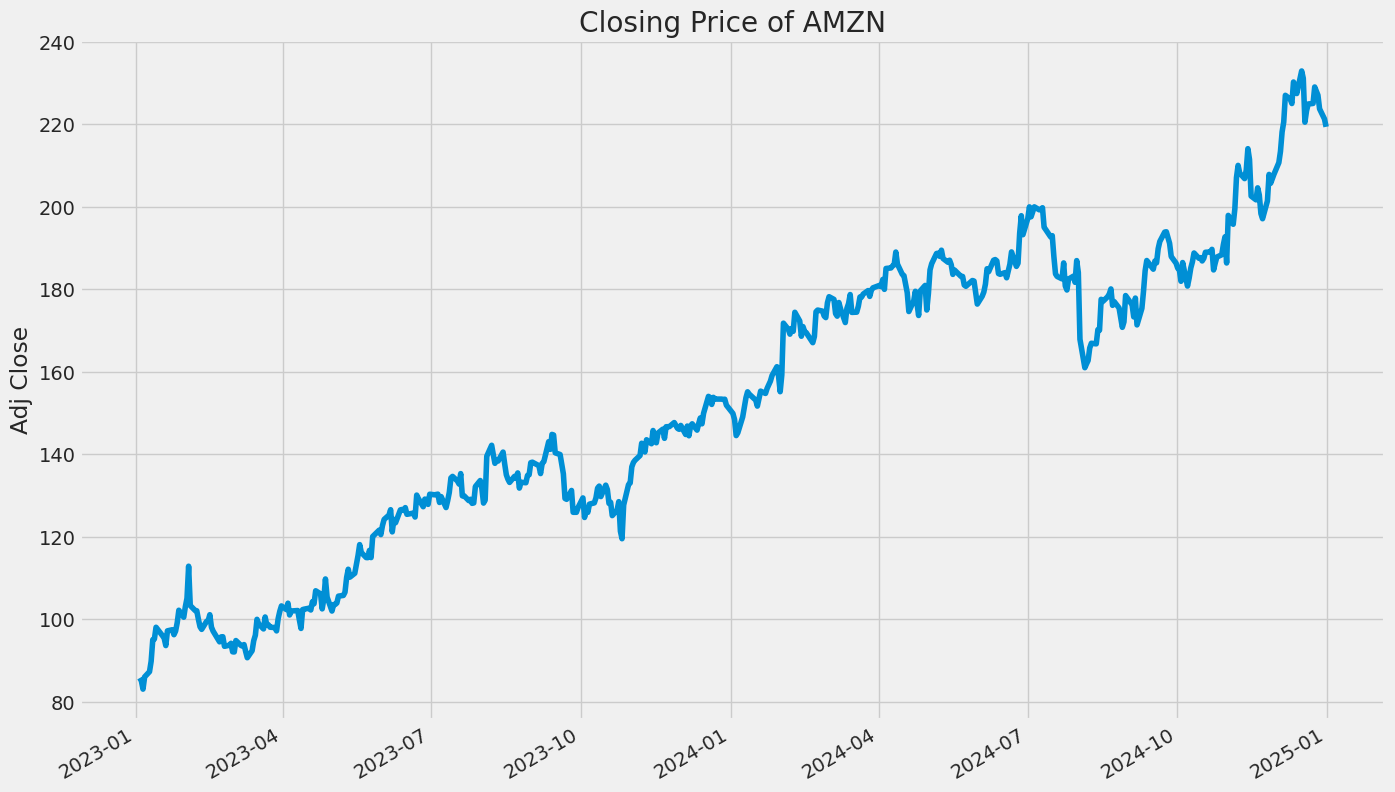

In [ ]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(1,5):
  plt.figure(figsize=(15,10))
  stock_data[company_list[i-1]]['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.grid(True)
  plt.title(f"Closing Price of {company_list[i-1]}")

## **🧠 Observations & Inference**

* Apple (AAPL) and Microsoft (MSFT) exhibit the strongest upward trends, indicating consistent investor confidence and potentially strong financial performance during this period.

* Google (GOOG) shows a steady climb with notable volatility, particularly in the latter half of 2024, possibly due to earnings reports or macroeconomic shifts.

* Amazon (AMZN) demonstrates a significant recovery and growth pattern, especially in 2024, suggesting a rebound from earlier lulls.

* Overall, all four companies show positive growth trajectories, making them attractive from a long-term investment standpoint.

## **📊 Visualizing Stock Trading Volume Over Time**

This code will generate line plots for the Trading Volume of each company, giving insight into the amount of shares being traded over the time period. These plots can help identify periods of high or low trading activity, which might correlate with significant price movements or events.

<Figure size 1500x1000 with 0 Axes>

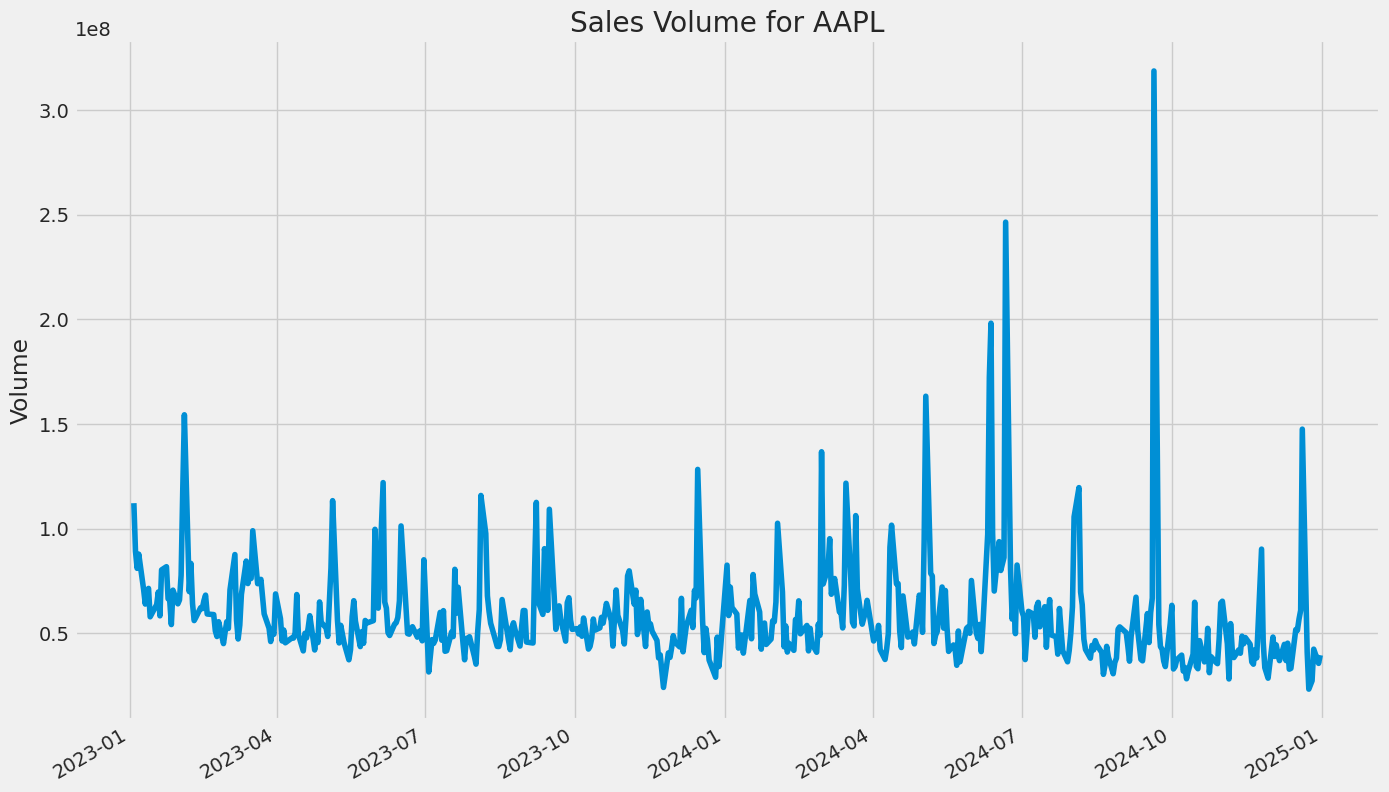

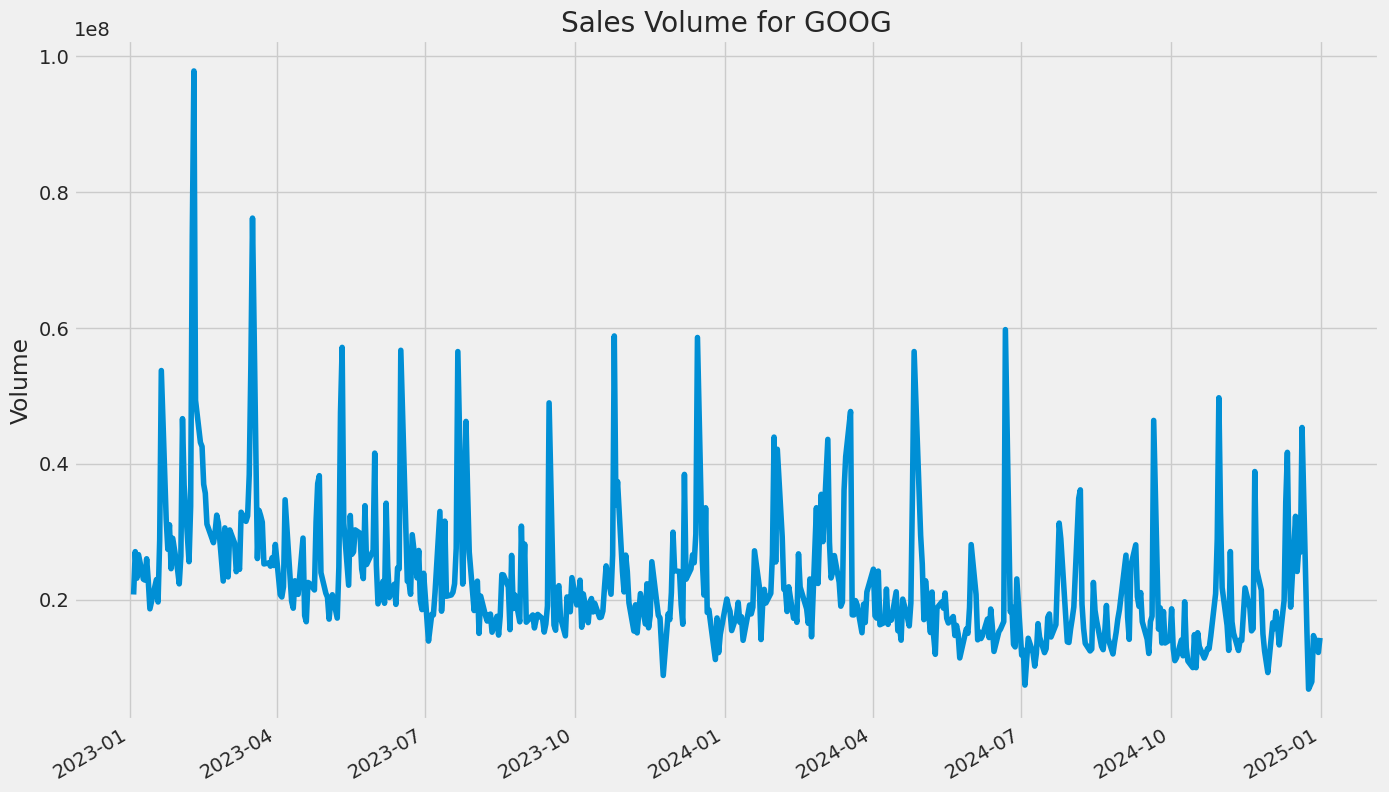

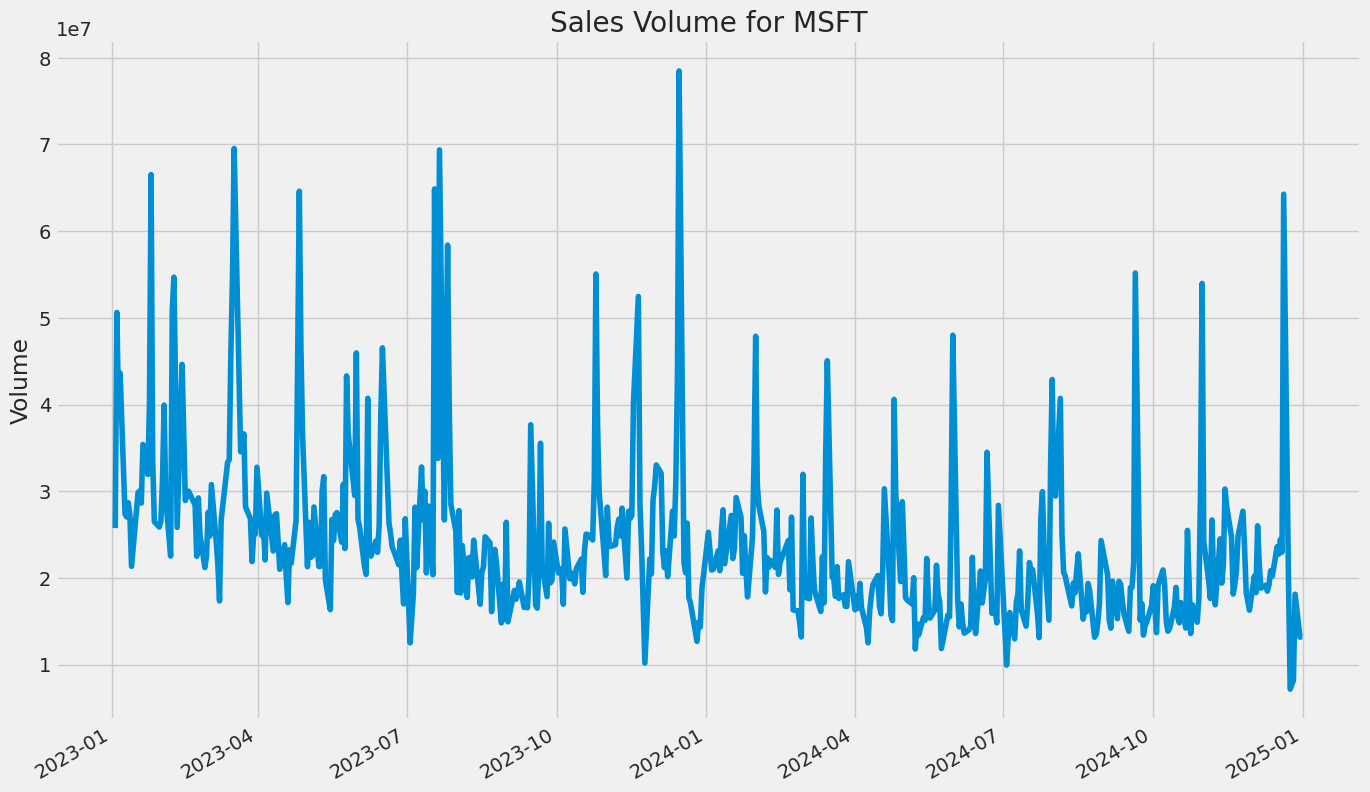

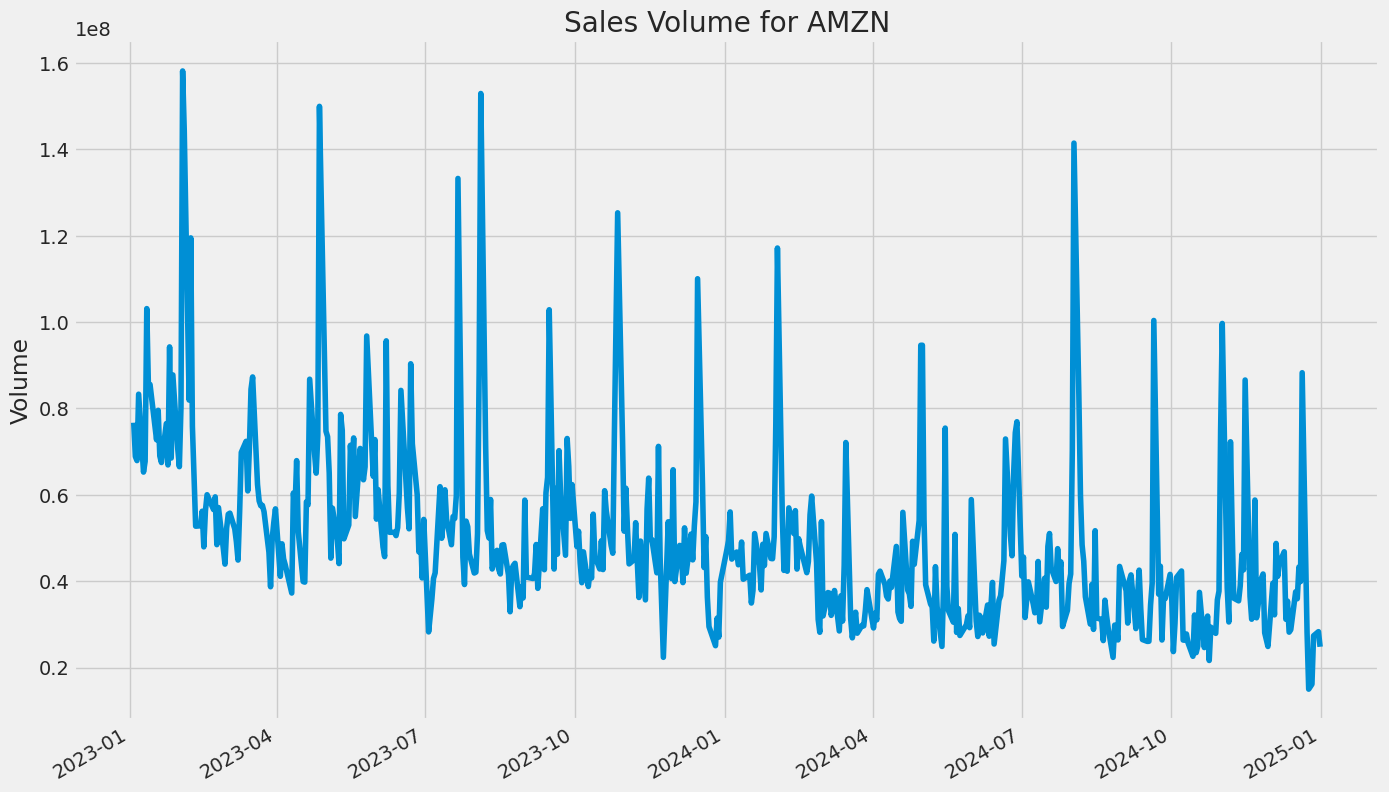

In [ ]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(1,5):
  plt.figure(figsize=(15,10))
  stock_data[company_list[i-1]]['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.grid(True)
  plt.title(f'Sales Volume for {company_list[i-1]}')

## **📈 Summary Comparison:**

| Stock | Avg Volume | Spike Frequency | Highest Observed Spike | General Trend    |
| ----- | ---------- | --------------- | ---------------------- | ---------------- |
| AAPL  | Highest    | Very High       | \~320M                 | Volatile, active |
| AMZN  | High       | High            | \~160M                 | Slight decline   |
| GOOG  | Medium     | Moderate        | \~98M                  | Stable           |
| MSFT  | Medium     | Low             | \~80M                  | Very stable      |


## **📉 Moving Averages: Analyzing Stock Trends Over Different Time Periods**

In this step, we compute the Moving Averages (MA) for each stock over the following periods: 10 days, 20 days, and 50 days. Moving averages help smooth out short-term fluctuations and highlight long-term trends. By comparing the actual Adjusted Close Price with these moving averages, we can better understand price movements and potential buy/sell signals.

<Figure size 1500x1000 with 0 Axes>

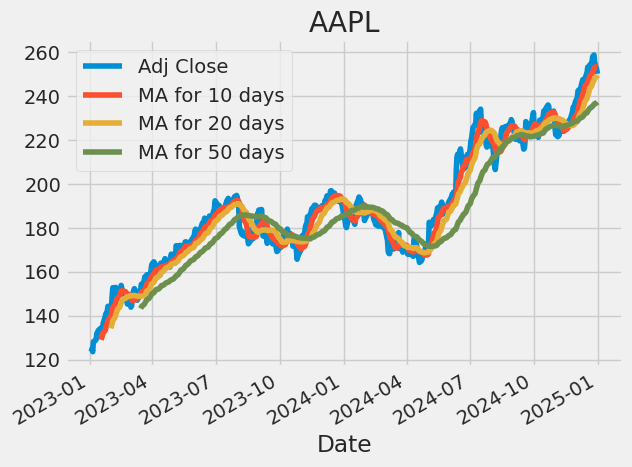

<Figure size 1500x1000 with 0 Axes>

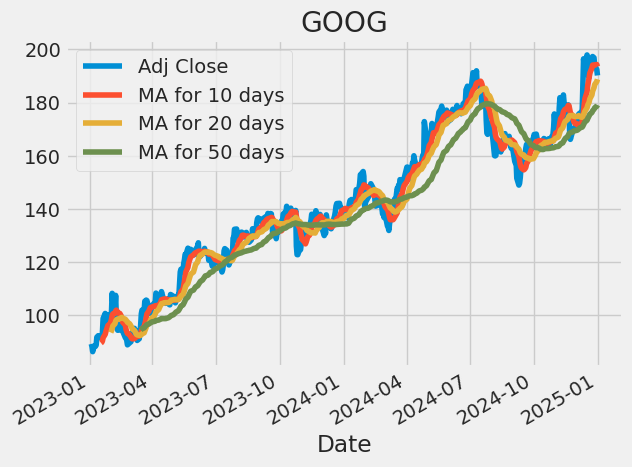

<Figure size 1500x1000 with 0 Axes>

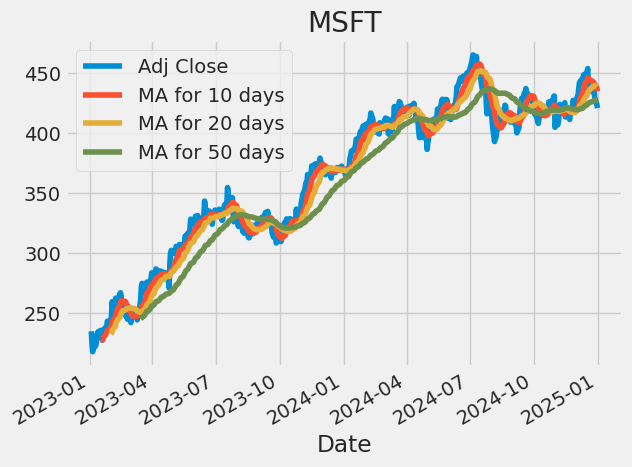

<Figure size 1500x1000 with 0 Axes>

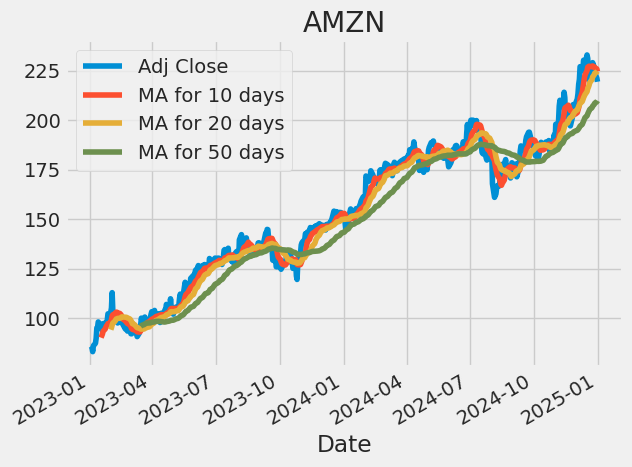

In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
  for cname in company_list:
    stock_data[cname][f'MA for {ma} days'] = stock_data[cname]['Adj Close'].rolling(ma).mean()

for idx, cname in enumerate(company_list):
  plt.figure(figsize=(15,10))
  stock_data[cname][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
  plt.title(cname)
  plt.grid(True)
  plt.show()

## **✅ Inference**

We can observe that the best values of ma are 10 and 20 days because that still capture trends in the data without noise.

## **📉 Visualizing Daily Returns: Price Movement Fluctuations**

This step generates line plots for the Daily Return of each stock. Daily returns represent the percentage change in the stock's adjusted close price from one day to the next. These plots will help visualize volatility and price fluctuations over time.

These plots provide insights into short-term volatility, highlighting periods of significant price changes (both positive and negative).

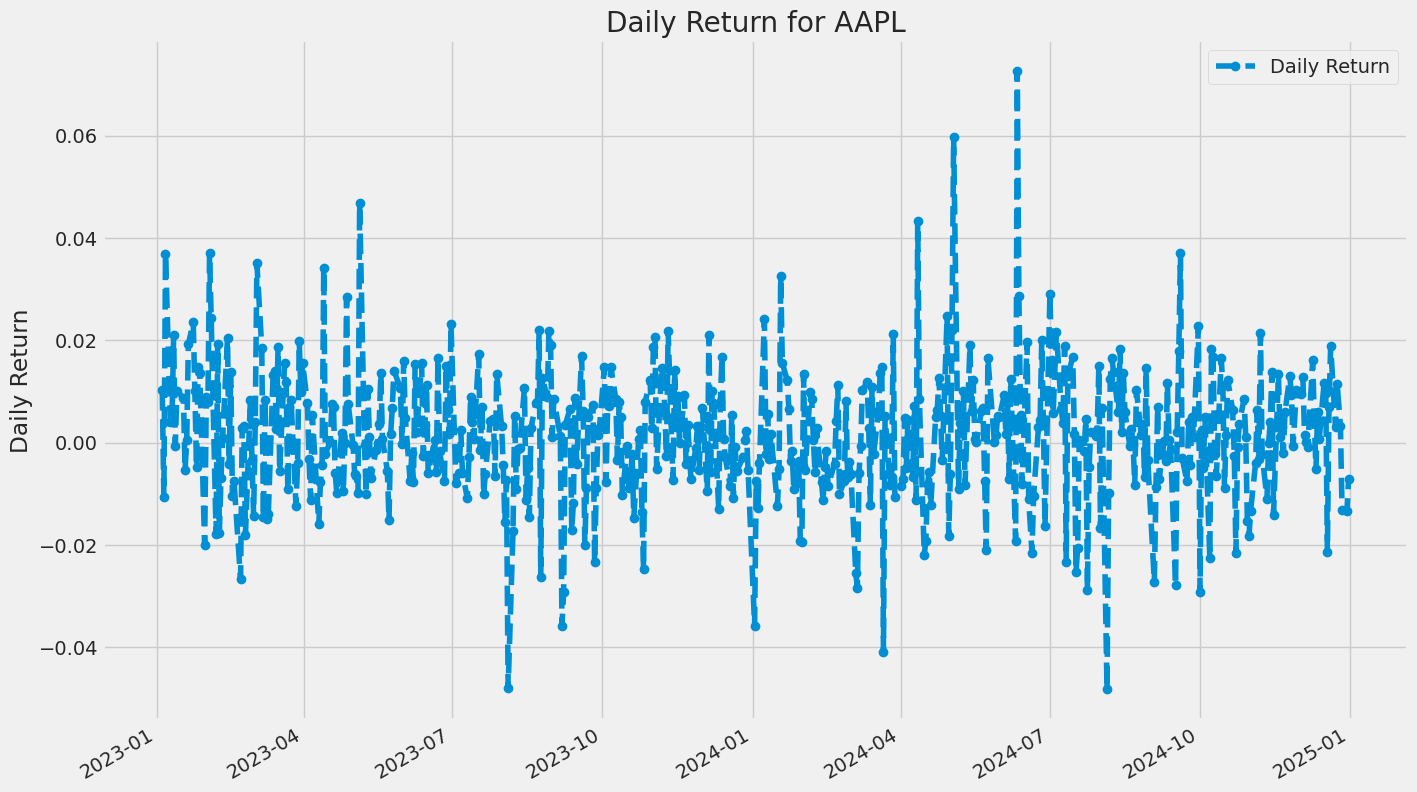

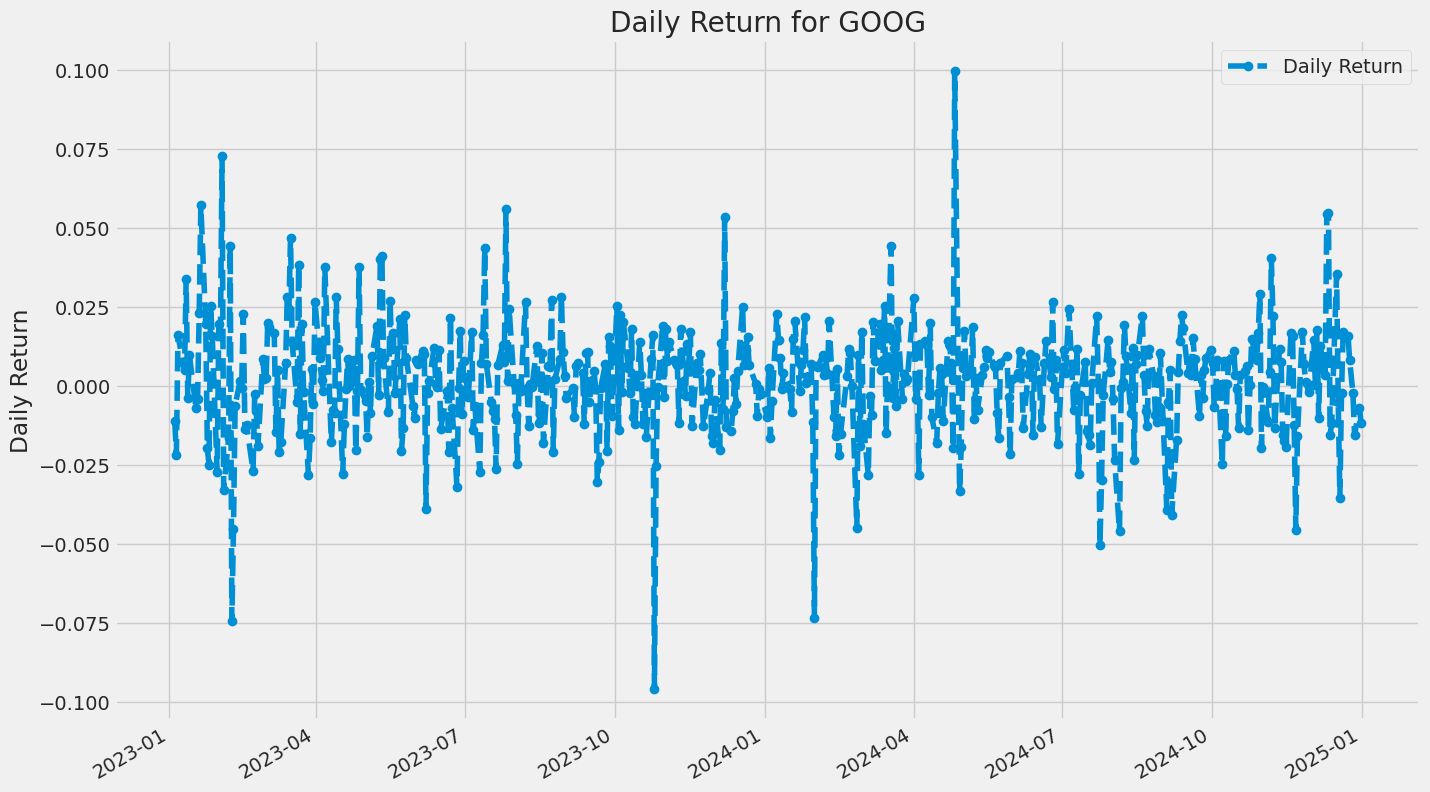

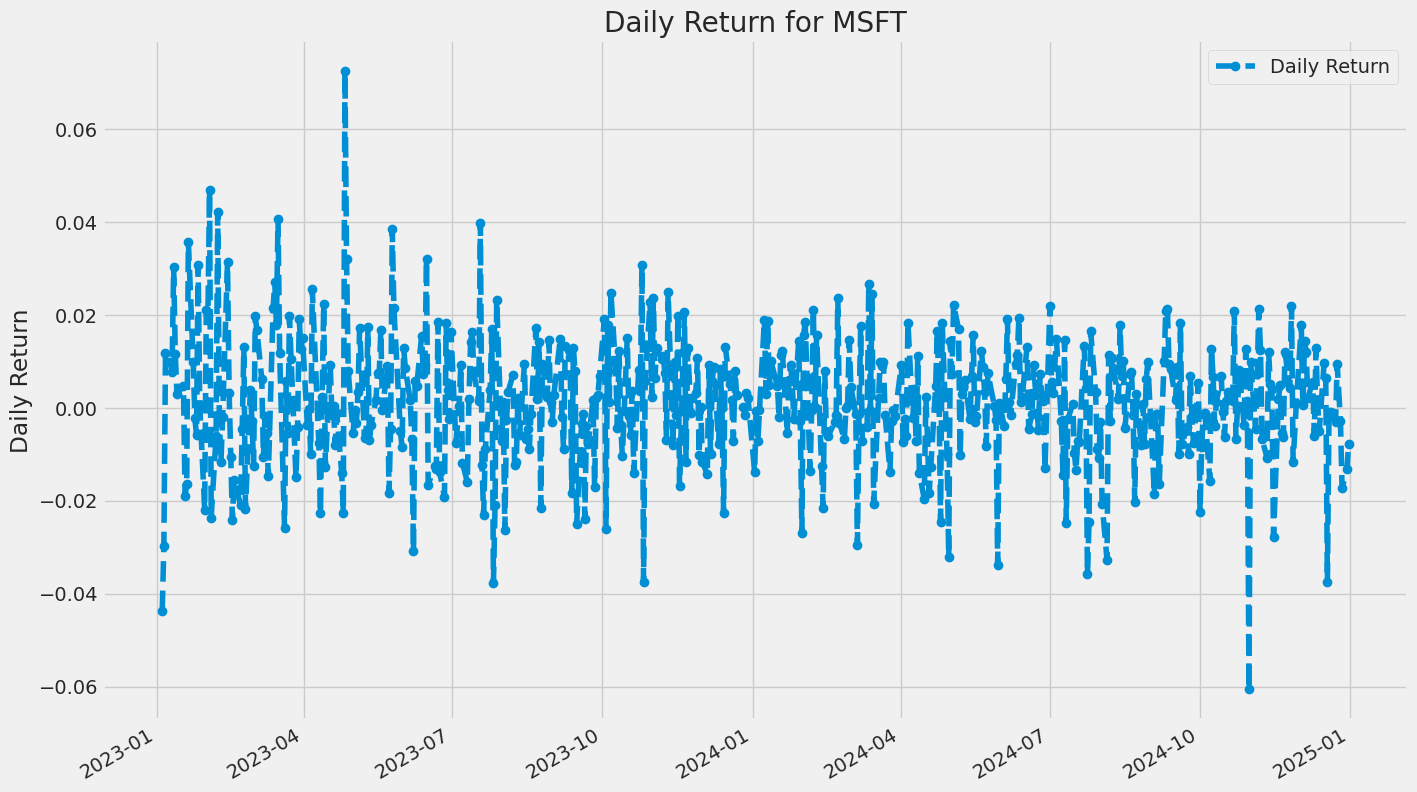

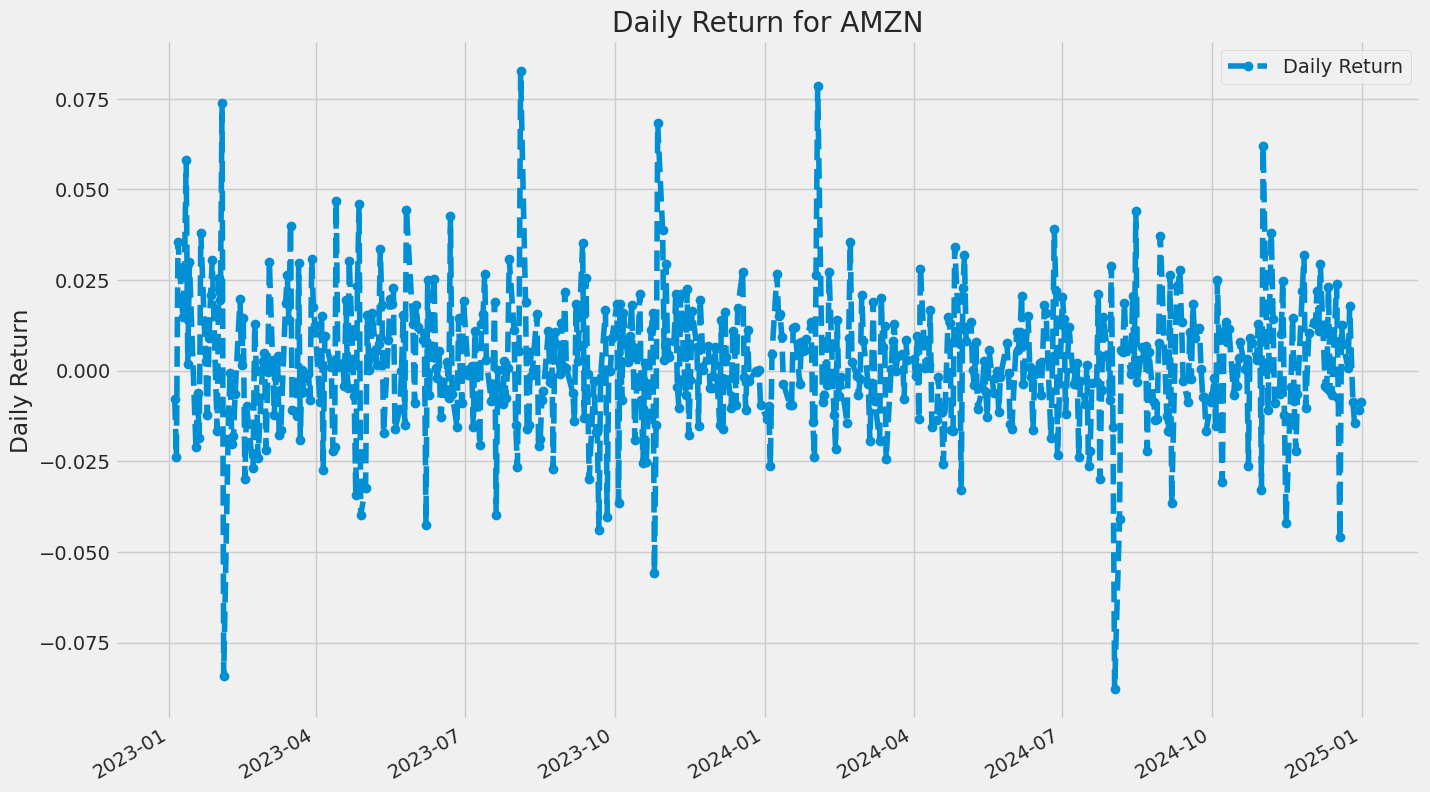

In [ ]:
for i in range(1,5):
  plt.figure(figsize=(15,10))
  stock_data[company_list[i-1]]['Daily Return'].plot(legend=True, linestyle='--', marker='o')
  plt.ylabel('Daily Return')
  plt.xlabel(None)
  plt.grid(True)
  plt.title(f'Daily Return for {company_list[i-1]}')

## **🧠 Overall Takeaway:**

* Most Stable: MSFT

* Highest Volatility: AMZN

* Greatest Outliers: GOOG

* Balanced Behavior: AAPL

These daily return plots provide valuable insight for investors regarding risk tolerance and timing strategies.

## **🛠 Handling Missing Data: Filling NaN Values**

In this step, we fill any remaining NaN values in the stock data with 0, ensuring there are no gaps or missing values that could affect subsequent analyses or models.

In [ ]:
stock_data['AAPL'].isnull().sum()
stock_data['AAPL'].fillna(0, inplace=True)
stock_data['GOOG'].fillna(0, inplace=True)
stock_data['MSFT'].fillna(0, inplace=True)
stock_data['AMZN'].fillna(0, inplace=True)

## **📊 Histogram Analysis of Daily Returns (Using Freedman–Diaconis Rule)**

**🔹 AAPL**
* **Shape:** Nearly normal, slight right skew.

* **Insights:** Most returns hover around zero with minor outliers on both sides.

**🔹 GOOG**
* **Shape:** Bell-shaped but with heavier tails, especially negative.

* **Insights:** Indicates occasional high volatility.

**🔹 MSFT**
* **Shape:** Very symmetric.

* **Insights:** Suggests consistent and stable returns, fewer extremes.

**🔹 AMZN**
* **Shape:** Also symmetric, but with a broader spread.

* **Insights:** Slightly more variability than MSFT, with positive-side outliers.

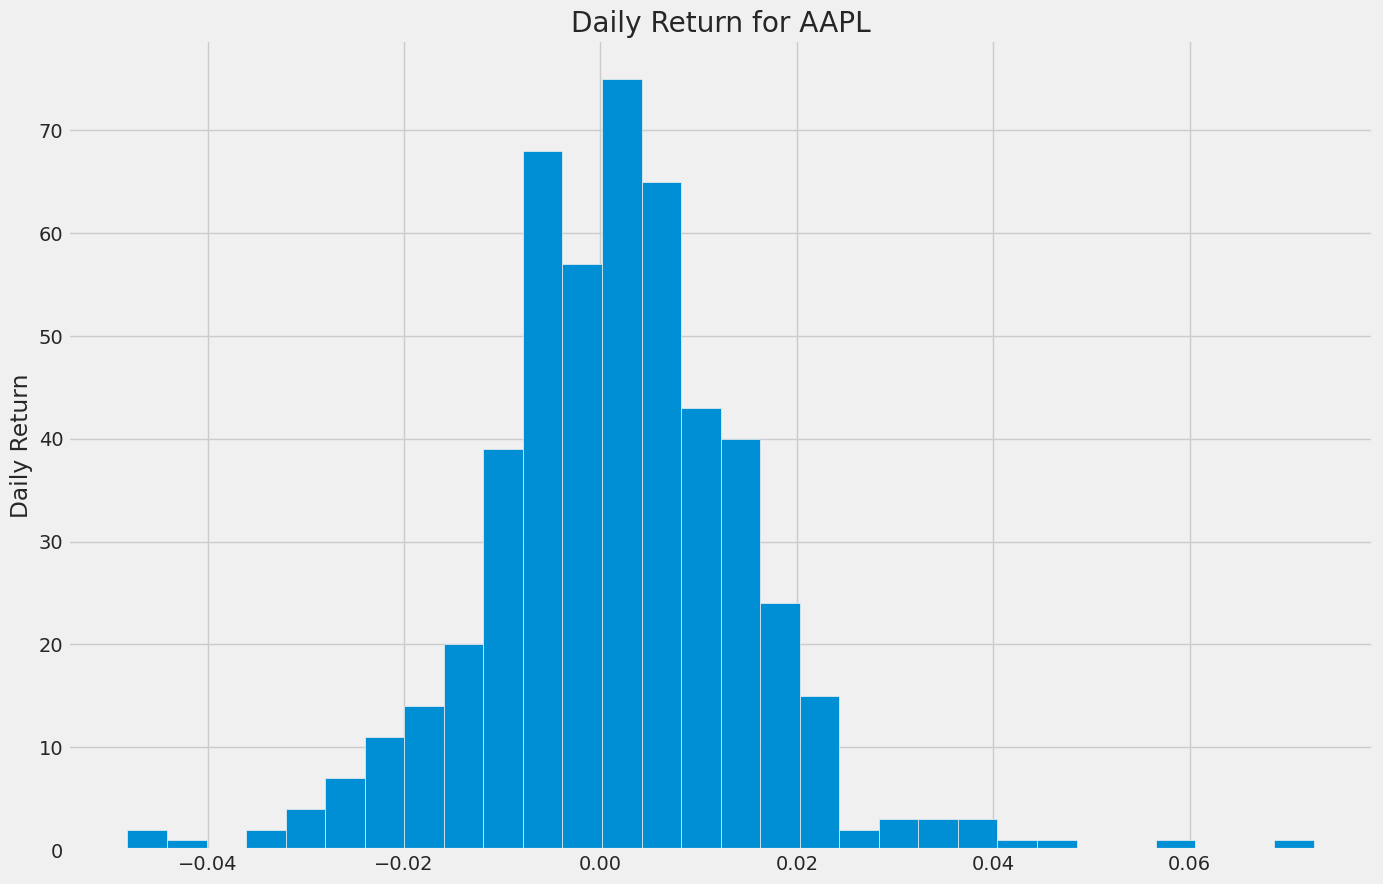

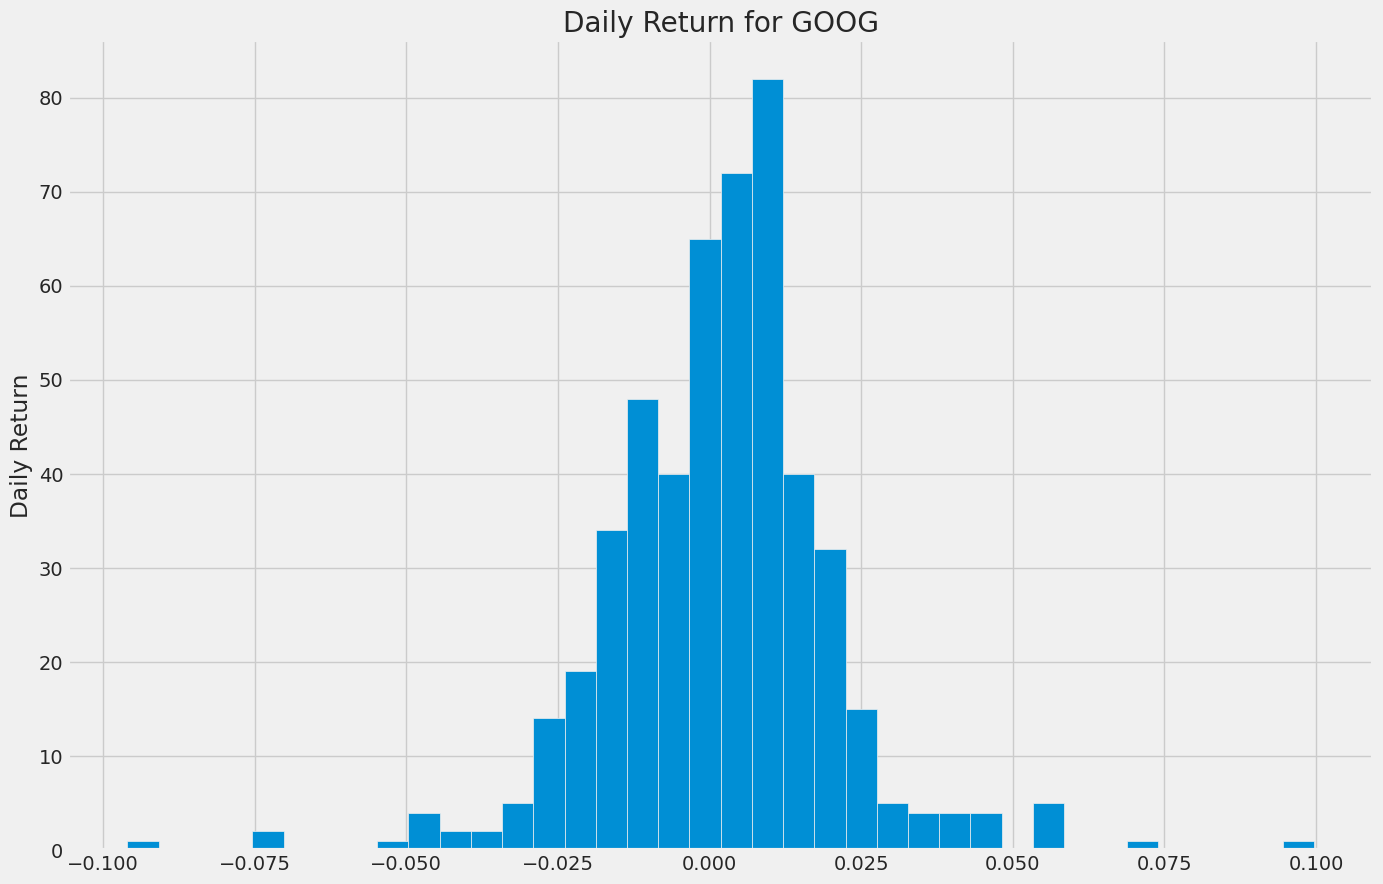

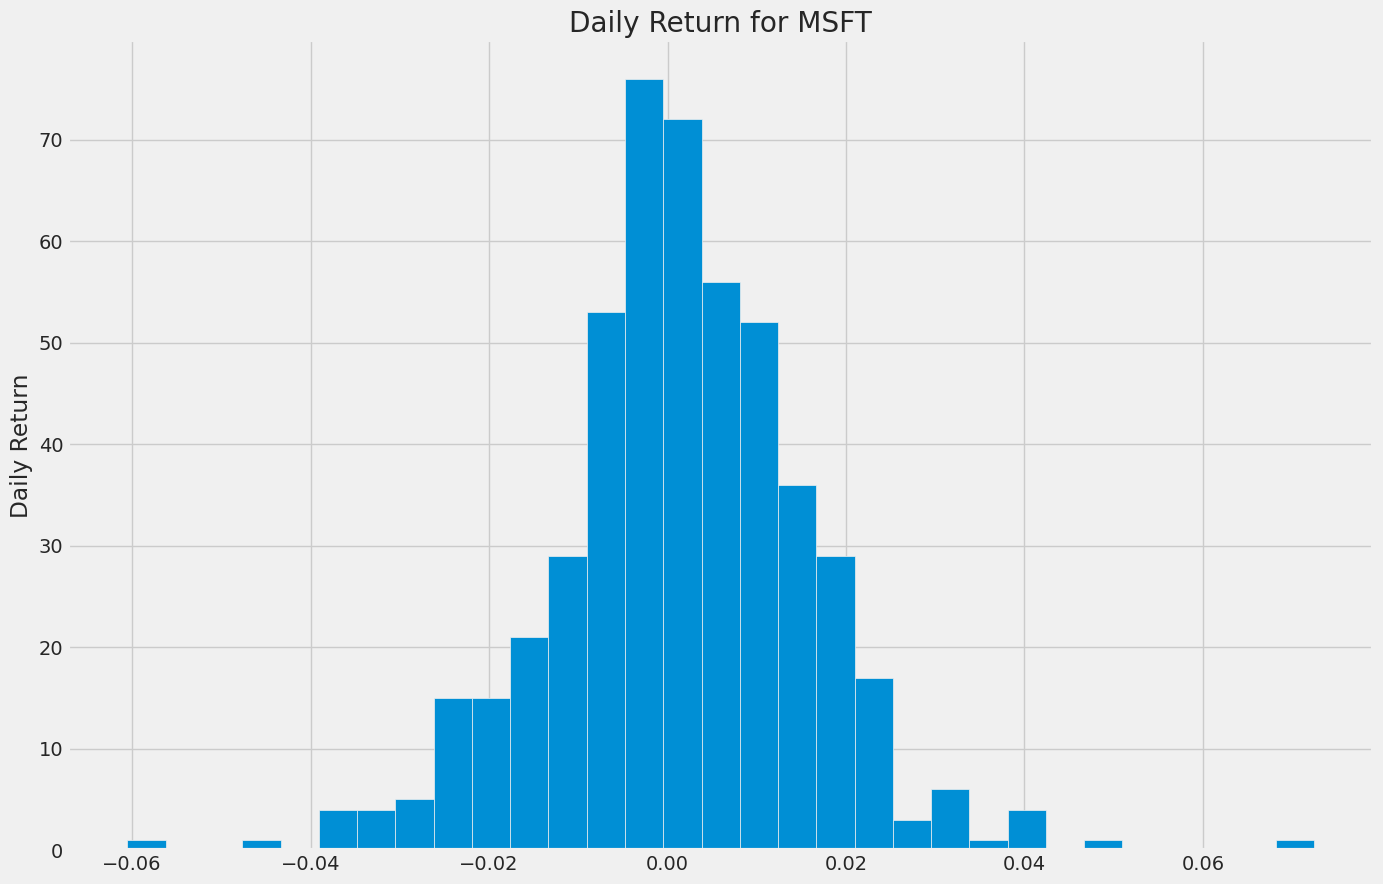

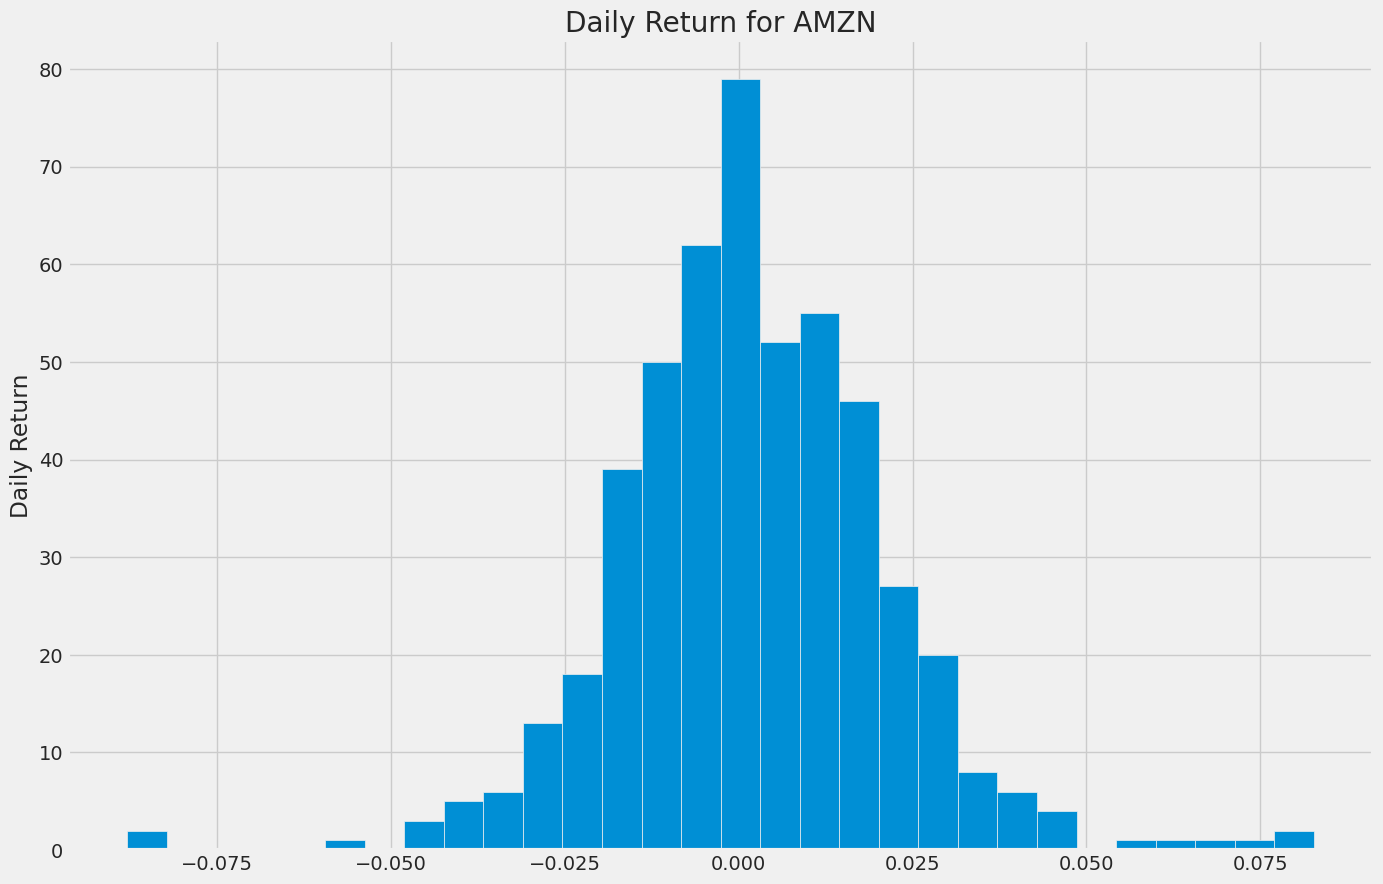

In [ ]:
#Selecting the size of the bins using Freedman-Diaconis Rule as it the best suited for stock type data set
#We get an overall look at the average daily return using a histogram
import scipy.stats as stats
for cname in company_list:
  iqr = stats.iqr(stock_data[cname]['Daily Return'])
  bin_width = 2*iqr/(len(stock_data[cname]['Daily Return'])**(1/3))
  num_bins = int((max(stock_data[cname]['Daily Return']) - min(stock_data[cname]['Daily Return']))/bin_width)
  plt.figure(figsize=(15,10))
  stock_data[cname]['Daily Return'].hist(bins=num_bins)
  plt.ylabel('Daily Return')
  plt.xlabel(None)
  plt.grid(True)
  plt.title(f'Daily Return for {cname}')


## **📊 Identifying Outliers Using Z-Score**

In this step, we apply the Z-Score method to identify potential outliers in the closing prices for each stock. A Z-score measures how many standard deviations a data point is from the mean. A Z-score greater than 3 typically indicates an outlier, suggesting that the value is significantly different from the mean.

In [ ]:
#Z-Score
from scipy import stats
for cname in company_list:
  z_scores = np.abs(stats.zscore(stock_data[cname]['Close']))
  outliers_zscore = stock_data[cname]['Close'][z_scores > 3]
  print(f'Company : {cname}','\n');
  print(f'Outlier Score using Z-Score : {outliers_zscore}','\n\n');

  # This means that the data is fairly normally distributed and doesn't have extreme values according to the standard deviation rule.

Company : AAPL 

Outlier Score using Z-Score : Series([], Name: Close, dtype: float64) 


Company : GOOG 

Outlier Score using Z-Score : Series([], Name: Close, dtype: float64) 


Company : MSFT 

Outlier Score using Z-Score : Series([], Name: Close, dtype: float64) 


Company : AMZN 

Outlier Score using Z-Score : Series([], Name: Close, dtype: float64) 




## **✅ Inference: Outlier Detection with Z-Score**

No outliers were detected in the closing prices for any of the companies (AAPL, GOOG, MSFT, AMZN). This suggests that the stock prices are fairly normally distributed and do not contain extreme values based on the Z-Score threshold.

## **📊 Identifying Outliers Using Interquartile Range (IQR)**

In this step, we apply the Interquartile Range (IQR) method to detect outliers in the closing prices for each stock. The IQR is the range between the 25th (Q1) and 75th (Q3) percentiles.

Any data points that fall outside of the range (Q1−1.5∗IQR, Q3+1.5∗IQR) are considered outliers.

In [ ]:
#Interquartile Range (IQR)
for cname in company_list:
  Q1 = np.percentile(stock_data[cname]['Close'], 25)
  Q3 = np.percentile(stock_data[cname]['Close'], 75)
  IQR = Q3 - Q1
  outliers_iqr = stock_data[cname]['Close'][(stock_data[cname]['Close'] < (Q1 - 1.5 * IQR)) | (stock_data[cname]['Close'] > (Q3 + 1.5 * IQR))]
  print(f'Company : {cname}','\n')
  print(f'Outlier Score using IQR : {outliers_iqr}','\n\n')
#Getting the same result

Company : AAPL 

Outlier Score using IQR : Series([], Name: Close, dtype: float64) 


Company : GOOG 

Outlier Score using IQR : Series([], Name: Close, dtype: float64) 


Company : MSFT 

Outlier Score using IQR : Series([], Name: Close, dtype: float64) 


Company : AMZN 

Outlier Score using IQR : Series([], Name: Close, dtype: float64) 




## **✅ Inference: Outlier Detection with IQR**

Just like with the Z-Score, the IQR method does not identify any outliers in the closing prices for the four companies (AAPL, GOOG, MSFT, AMZN). This means the stock prices are not exhibiting extreme values that deviate significantly from the central distribution, based on this method as well.

## **🧮 Calculating Daily Returns for Multiple Stocks**

In this step, we create a DataFrame containing the adjusted closing prices for all the stocks (AAPL, GOOG, MSFT, AMZN) and calculate the daily returns for each stock using the percentage change (pct_change()). This will give us an understanding of how each stock performed relative to its previous day's adjusted closing price.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
adj_close = pd.DataFrame()
for ticker, df in stock_data.items():
  adj_close[ticker] = df['Adj Close']
  tech_rets = adj_close.pct_change()
print(tech_rets.head(),'\n\n')

                               AAPL      GOOG      MSFT      AMZN
Date                                                             
2023-01-03 05:00:00+00:00       NaN       NaN       NaN       NaN
2023-01-04 05:00:00+00:00  0.010314 -0.011037 -0.043743 -0.007924
2023-01-05 05:00:00+00:00 -0.010605 -0.021869 -0.029638 -0.023726
2023-01-06 05:00:00+00:00  0.036794  0.016019  0.011785  0.035611
2023-01-09 05:00:00+00:00  0.004089  0.007259  0.009736  0.014870 




## **📈 Visualizing Stock Return Relationships with Scatter Matrix Plots**

In this section, we visualize the relationships between daily returns of various tech stocks using scatter plots and histograms. This helps us understand how the returns of one stock correlate with another, and whether they move in tandem.

## **🔍 Plot 1: GOOG vs GOOG**

* The scatter plot of GOOG vs GOOG forms a perfect diagonal line, as it is simply plotting the stock against itself.

* The histograms on the top and side reveal the distribution of daily returns for GOOG.

* The distribution appears approximately normal, which is common in financial return series.

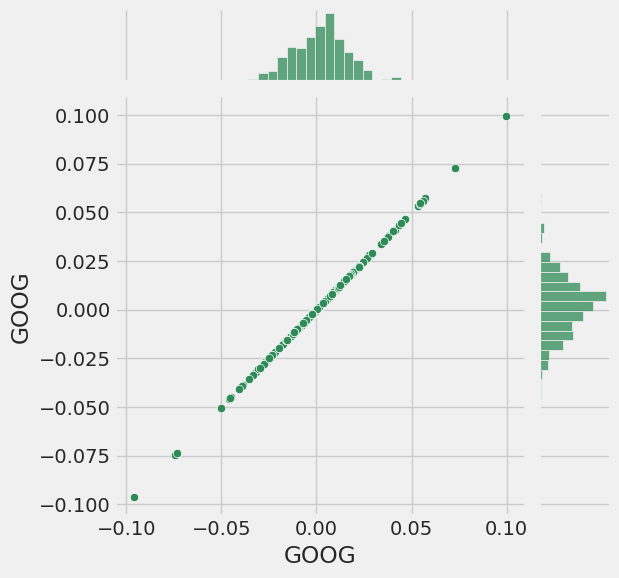

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

# **🔍 Plot 2: GOOG vs MSFT**

* This scatter plot shows a positive correlation between GOOG and MSFT daily returns.

* As the returns of GOOG increase, those of MSFT tend to rise as well, although the relationship is not perfectly linear.

* Compared to GOOG vs GOOG, the data points are more dispersed, as expected.

* Both stocks' return distributions remain roughly normal, though minor skewness or outliers may be present.

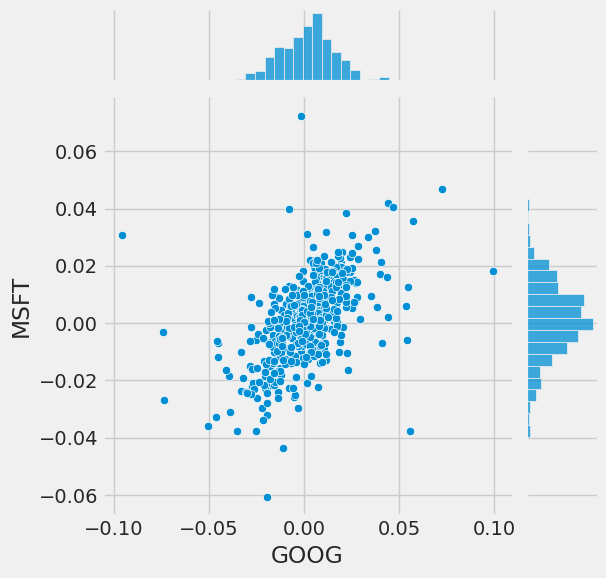

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

## **Pair Plot of Daily Returns (Linear Regression & Histograms)**

This plot visualizes the daily returns of AAPL, GOOG, MSFT, and AMZN using scatter plots with linear regression lines and histograms on the diagonal.

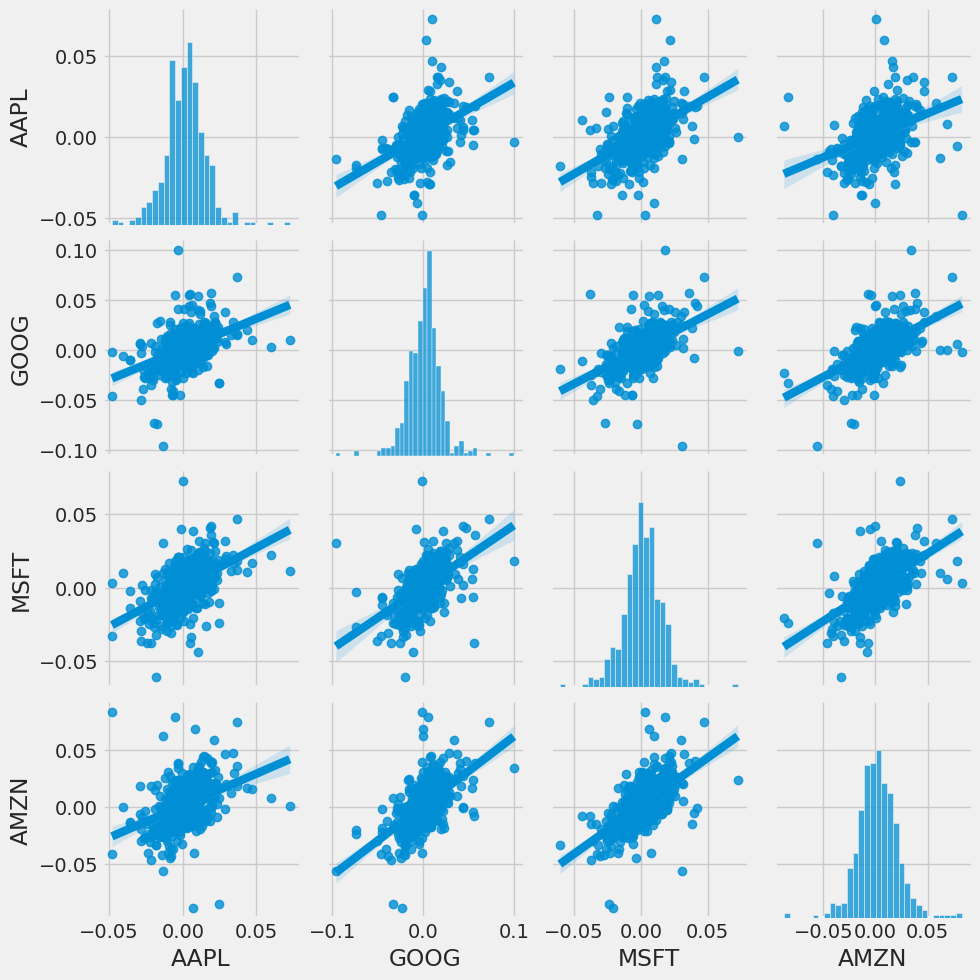

In [ ]:
sns.pairplot(tech_rets, kind='reg')

# **Inference:**

* **Positive Correlation:** There is a clear positive correlation between the daily returns of the stocks, especially between GOOG & MSFT, and AAPL & MSFT. This suggests that these stocks often move in the same direction on a daily basis.

* **Normal Distribution:** The diagonal histograms indicate that the daily returns of each stock roughly follow a normal distribution, centered around zero.

* **Diversification Insight:** The moderate correlations imply that while the stocks are related, they are not perfectly correlated, offering some diversification benefit.

## **Pair Plot of Daily Returns with KDE & Histograms**

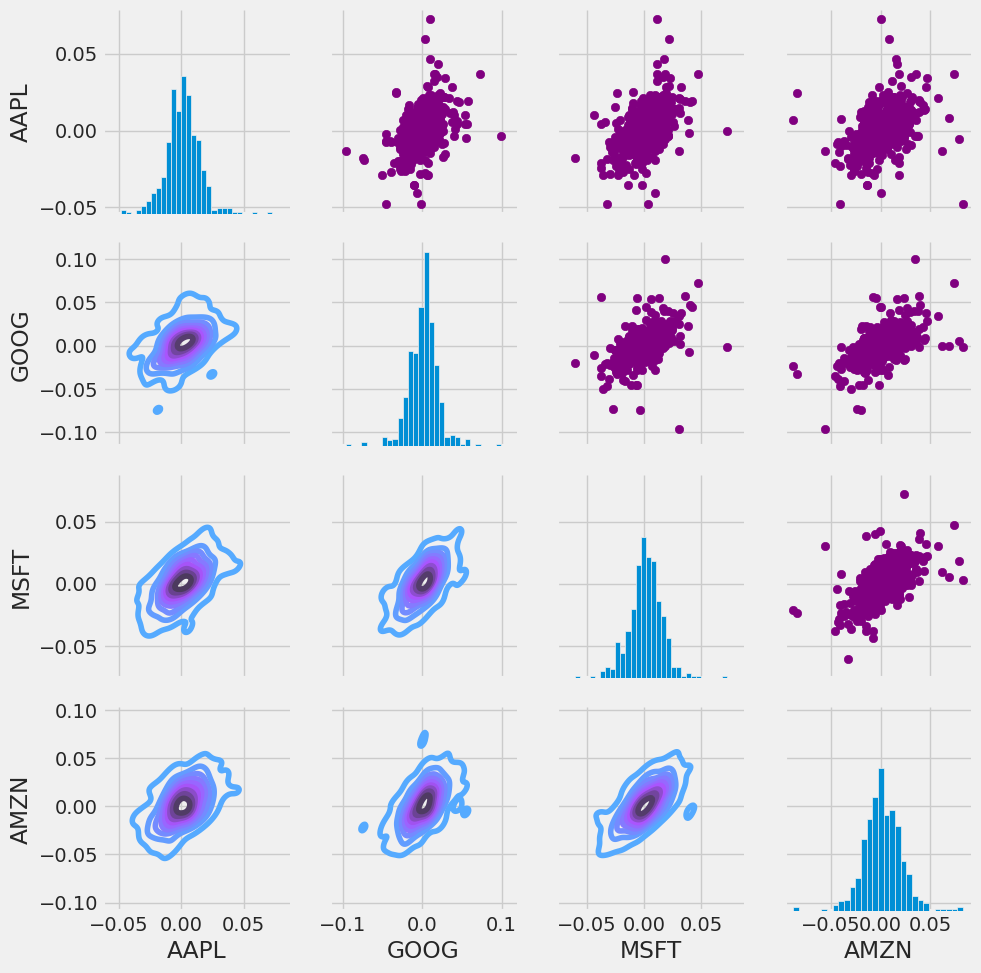

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

## **Inference:**

* **Daily Return Distributions:** The diagonal histograms show that daily returns for AAPL, GOOG, MSFT, and AMZN are approximately normally distributed, centered around 0%.

* **Correlation Patterns:** The scatter plots in the upper triangle indicate positive relationships between stock returns, especially between pairs like MSFT–AMZN and GOOG–MSFT.

* **KDE Density Insight:** The lower triangle with KDE plots (using the 'cool_d' colormap) visualizes the joint density of returns. Elliptical contours in this region further confirm the strength and direction of correlations.


## **Pair Plot of Adjusted Close Prices with KDE & Histograms**

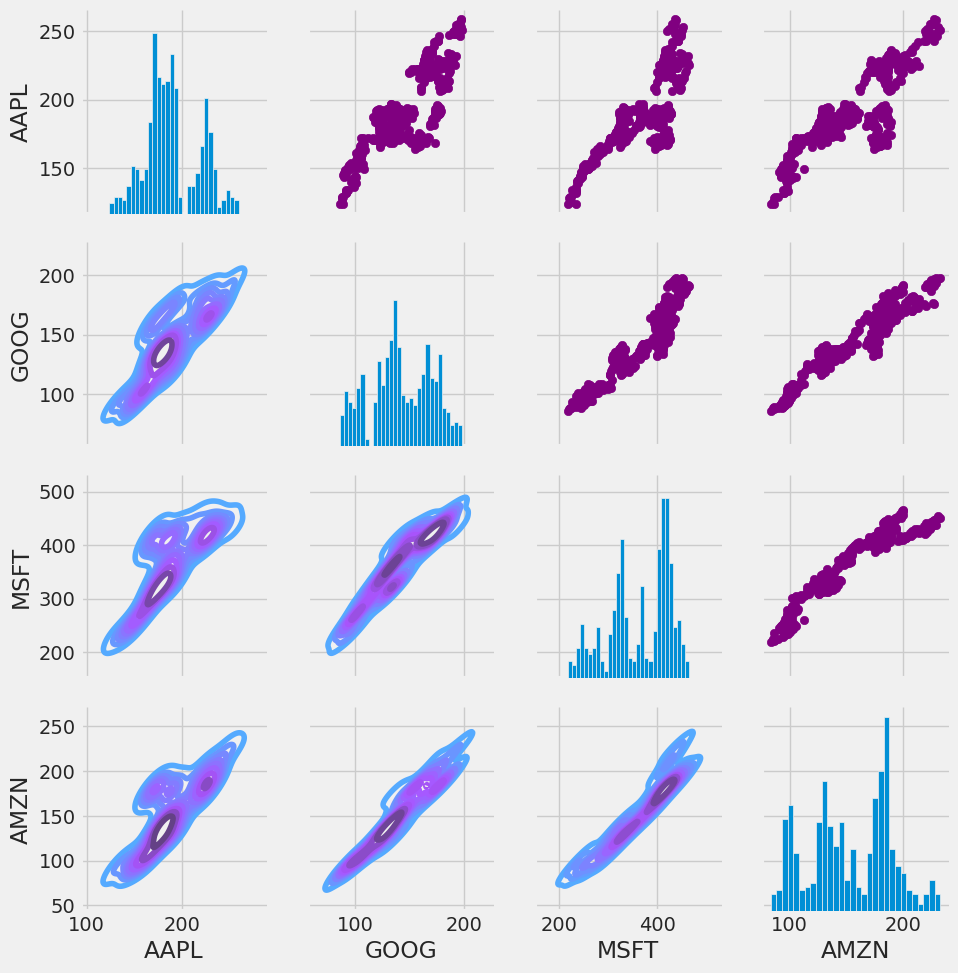

In [ ]:
returns_fig = sns.PairGrid(adj_close)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

## **Inference:**

* **Strong Positive Linear Relationships:** The scatter plots show a strong linear relationship between stock prices of the companies, with almost all pairs following an upward trend.

* **Non-Stationary Data:** The clustering and increasing patterns indicate that prices are non-stationary and have trended upwards over time.

* **Different Price Scales:** While the general upward trend is consistent, the price ranges vary (e.g., MSFT goes up to ~500, AAPL is ~150–250), indicating that direct comparisons of price levels are not meaningful without normalization.

## **📊 Correlation Analysis of Tech Stocks: Returns vs. Prices**

To understand how tech stocks behave in relation to each other, we examine two types of heatmaps: one for daily returns and one for adjusted closing prices.

Text(0.5, 1.0, 'Correlation of stock closing price')

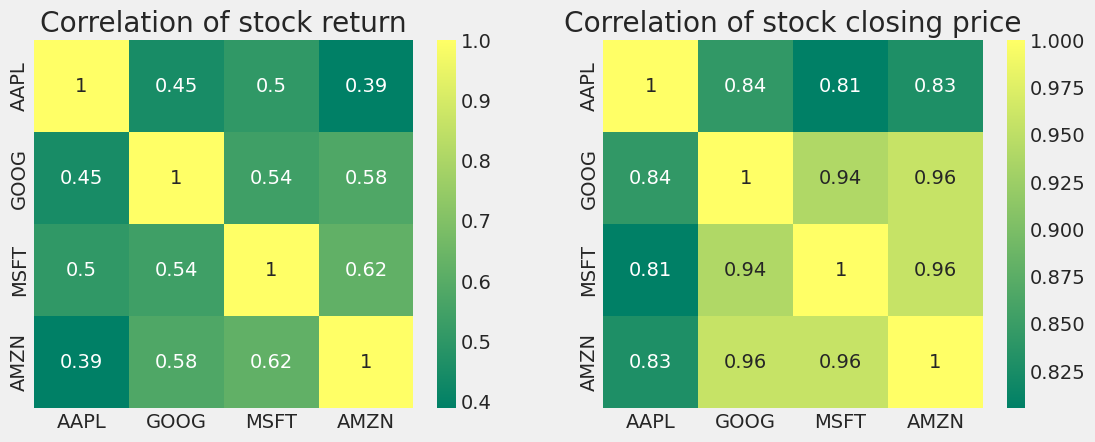

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adj_close.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## **🔹 Daily Returns Heatmap**

* **Range:** ~0.39 to 0.62 → moderate positive correlation.

* **Example:**
      GOOG & MSFT: 0.54
      MSFT & AMZN: 0.62 (strongest)

**📌 Inference:** Returns are moderately correlated—good for diversification.

## **🔹 Adjusted Close Prices Heatmap**

* **Range:** ~0.81 to 0.96 → very strong correlation.

* **Example:**

      GOOG & AMZN / MSFT & AMZN: 0.96 (highest)

**📌 Inference:** Prices trend together over time due to market-wide factors.

      ✅ MSFT & AMZN show strongest and most consistent correlations across both metrics.

## **📉 Risk vs Return Scatter Plot (Tech Stocks)**

**🔹 Axes Interpretation**
* **X-axis:** Expected Return (mean of daily returns) — farther right means higher average gain.

* **Y-axis:** Risk (standard deviation of returns) — higher up means more day-to-day fluctuation.

* Each dot represents a stock.

* Bottom-right corner = best zone (high return, low risk).

* Top-left corner = worst zone (low return, high risk).

This visualization helps balance profit potential vs volatility when selecting stocks.

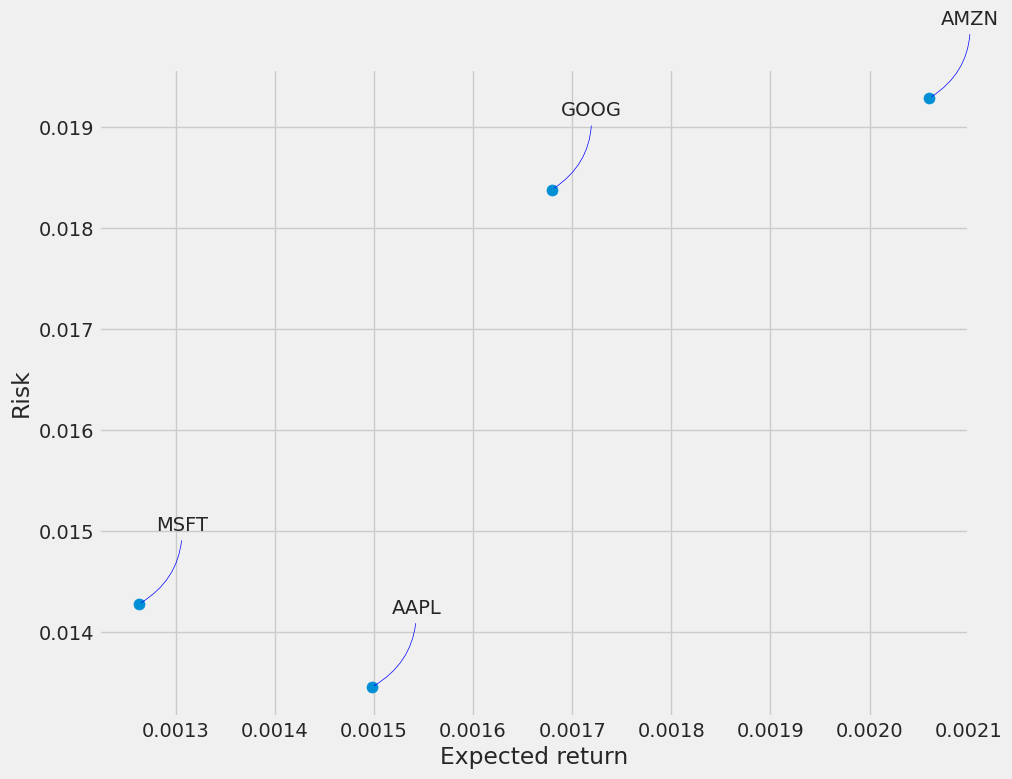

In [ ]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))


| Stock    | Expected Return | Risk    | Comment                                                    |
| -------- | --------------- | ------- | ---------------------------------------------------------- |
| **AAPL** | Low-Mid         | Lowest  | Most efficient: lowest risk with decent return.            |
| **MSFT** | Lowest          | Low     | Conservative profile, less return but also low volatility. |
| **GOOG** | Mid-High        | High    | Balanced—higher return but comes with more risk.           |
| **AMZN** | Highest         | Highest | Aggressive: highest return but also most volatile.         |


**✅ Portfolio Insight:**

* AAPL is arguably the most efficient on a risk-return basis.

* AMZN could be attractive in a high-risk, high-reward strategy.

* If combining these stocks in a portfolio, diversification could reduce overall risk due to differing correlations (as seen in your earlier heatmaps).

## **🧠 ML Classification Summary: Stock Movement Prediction (2023–2025)**

**✅ Approach**
* Models: Decision Tree & Random Forest

* Techniques: Oversampling with SMOTE and ADASYN

* Metrics: Accuracy, Precision, and AUC

* Target: Whether stock goes up the next day (Target = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

companies = {
    'AAPL': df_aapl.copy(),
    'GOOG': df_goog.copy(),
    'MSFT': df_msft.copy(),
    'AMZN': df_amzn.copy()
}

predictors = ['Open', 'High', 'Low', 'Adj Close', 'MA for 10 days', 'MA for 20 days']

for name, df in companies.items():
    print(f"\n\n========== Company: {name} ==========\n")

    df = df.copy()
    df['Tomorrow'] = df['Adj Close'].shift(-1)
    df['Target'] = (df['Tomorrow'] > df['Adj Close']).astype(int)

    train = df.loc['2023-01-01':'2024-06-30'].dropna()
    test = df.loc['2024-07-01':'2025-01-01'].dropna()

    X_train = train[predictors]
    y_train = train['Target']
    X_test = test[predictors]
    y_test = test['Target']

    smote = SMOTE(random_state=42)
    adasyn = ADASYN(n_neighbors=1, sampling_strategy='auto', random_state=42)

    try:
        X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"ADASYN failed for {name}: {e}. Using original training data.")
        X_adasyn, y_adasyn = X_train.copy(), y_train.copy()

    X_smote, y_smote = smote.fit_resample(X_train, y_train)

    datasets = {
        'Original': (X_train, y_train),
        'SMOTE': (X_smote, y_smote),
        'ADASYN': (X_adasyn, y_adasyn)
    }

    for dataset_name, (X_tr, y_tr) in datasets.items():
        print(f"\n-- Dataset: {dataset_name} --")

        # Decision Tree
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_tr, y_tr)
        dt_preds = dt.predict(X_test)
        dt_probs = dt.predict_proba(X_test)[:, 1]

        # Random Forest
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_tr, y_tr)
        rf_preds = rf.predict(X_test)
        rf_probs = rf.predict_proba(X_test)[:, 1]

        # Metrics
        dt_acc = accuracy_score(y_test, dt_preds)
        dt_prec = precision_score(y_test, dt_preds)
        dt_auc = roc_auc_score(y_test, dt_probs)

        rf_acc = accuracy_score(y_test, rf_preds)
        rf_prec = precision_score(y_test, rf_preds)
        rf_auc = roc_auc_score(y_test, rf_probs)

        print(f"Decision Tree  -> Accuracy: {dt_acc:.4f}, Precision: {dt_prec:.4f}, AUC: {dt_auc:.4f}")
        print(f"Random Forest  -> Accuracy: {rf_acc:.4f}, Precision: {rf_prec:.4f}, AUC: {rf_auc:.4f}")



========== Company: AAPL ==========

ADASYN failed for AAPL: No samples will be generated with the provided ratio settings.. Using original training data.

-- Dataset: Original --
Decision Tree  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5090
Random Forest  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5030

-- Dataset: SMOTE --
Decision Tree  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5090
Random Forest  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5154

-- Dataset: ADASYN --
Decision Tree  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5090
Random Forest  -> Accuracy: 0.4016, Precision: 0.7500, AUC: 0.5030


========== Company: GOOG ==========


-- Dataset: Original --
Decision Tree  -> Accuracy: 0.6063, Precision: 0.6100, AUC: 0.5691
Random Forest  -> Accuracy: 0.5906, Precision: 0.6020, AUC: 0.6047

-- Dataset: SMOTE --
Decision Tree  -> Accuracy: 0.6220, Precision: 0.6250, AUC: 0.5894
Random Forest  -> Accuracy: 0.5906, Precision: 0.6042, AUC: 0.5721

-- Dataset: ADAS

# **📌 Overall Insights**

🧪 GOOG stands out for both Decision Tree and Random Forest.

🛑 ADASYN often fails when the class distribution is too balanced.

⚠️ SMOTE helps a little but does not guarantee performance boost.

🎯 Feature set may need expansion (e.g., momentum indicators, macro data).

📉 AUC < 0.6 → Models aren’t robust enough yet for reliable predictions.

## **📊 Confusion Matrix for GOOG - Random Forest with ADASYN**

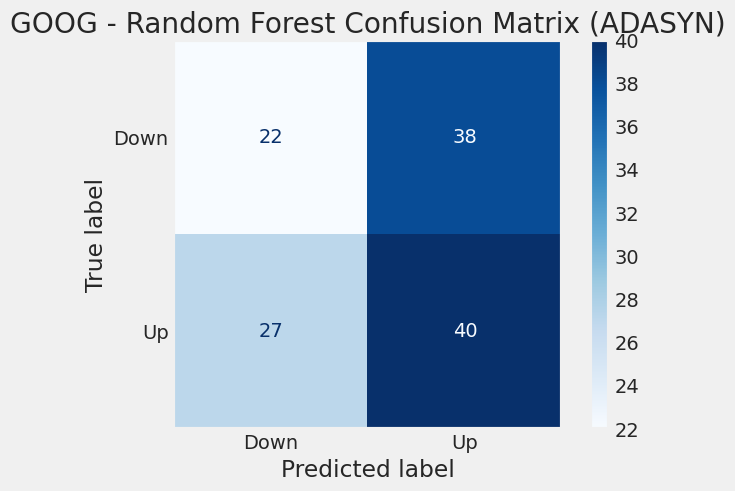

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot(cmap='Blues')
plt.title("GOOG - Random Forest Confusion Matrix (ADASYN)")
plt.grid(False)
plt.show()


## **Inference:**

* The model shows reasonable balance between correctly predicting upward (positive) and downward (negative) movements in GOOG stock.

* The True Positives (Up predicted as Up) and True Negatives (Down predicted as Down) dominate over the misclassifications.

* However, there are still a notable number of False Positives and False Negatives, which suggests some uncertainty in borderline cases.

* Given the AUC score (~0.61), the model demonstrates moderate discriminative ability, making it usable but not highly reliable for directional stock prediction.

## **✅ Final Conclusion**

🔍 GOOG was the most predictable, with the best performance across both models and sampling strategies (AUC up to 0.613).

📉 AAPL, MSFT, and AMZN exhibited low predictability, with AUCs hovering near 0.50 — indicating performance close to random guessing.

⚖️ ADASYN frequently failed due to minimal class imbalance, limiting its usefulness for this dataset.

📊 SMOTE had mixed success, showing slight improvements for some companies but not consistently.

🔎 Tree-based models alone may be insufficient for short-term stock movement prediction. Market data is inherently noisy, and price direction is influenced by complex, often external factors (e.g., news, macro events) not captured in historical prices alone.